# Project Background

### Airbnb is a booking service for vacation rentals in which vacationers can book from an available list of user offered vacation rental services.  This platform is the most popular service of its type and is used in over 193 countries and features more than 2 million individual properties.  This open market concept has given vacationers the opportunity to evaluate many options based on the individual’s wants and needs.

### Each year Airbnb releases a series of datasets which contain information on vacation rental listings for several major cities around the world.  In this case we will be evaluating the September 7, 2022 listing report from New York City.  Our goal is to determine from this data what feature of a listing best contributes to its price and if we can use these features to properly predict the price of this dataset’s contained listings.  

### In this first intersection we will be introducing the dataset.  This includes a description of its variables as well as an evaluation into the underlying structure of the data.  We have done this in three stages description, data cleaning and outlier evaluation.

### Goals:
 ### * Investigate the features responsible for listing cost.
 ### * Properly produce and evaluate a prediction model for listing cost.
 
# Acknowledgement 
### This dataset is part of Airbnb Inside, and the original source can be found [here](http://insideairbnb.com/get-the-data/). Date Compiled (07 September, 2022)

### For dataset description, We have used Glossary of Terms from [here](https://www.airdna.co/airdna-glossary-of-metric-definitions) as well as our understanding from [airbnb site](https://www.airbnb.ca/).

In [1]:
#importing modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
import seaborn as sns
from scipy.stats import ttest_ind

from sklearn.metrics import mutual_info_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder


from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.metrics import mutual_info_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import reciprocal
from sklearn.preprocessing import LabelEncoder
sns.set()
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel


from scipy.stats import skew
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, QuantileTransformer, Normalizer, FunctionTransformer, RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score

In [2]:
#importing Dataset
ny_listing_dataset = pd.read_csv('listings.csv.gz',
                                 parse_dates=['host_since', 'last_scraped', 'first_review', 'last_review'],
                                 low_memory = False)

# Data Description

### In this section we will be having a look at the data to get an overview of its contained features and their possible use in contributing and predicting listing cost.

In [3]:
#information about DataFrame including the index dtype and columns, non-null values and memory usage
ny_listing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            39881 non-null  int64         
 1   listing_url                                   39881 non-null  object        
 2   scrape_id                                     39881 non-null  int64         
 3   last_scraped                                  39881 non-null  datetime64[ns]
 4   source                                        39881 non-null  object        
 5   name                                          39868 non-null  object        
 6   description                                   39036 non-null  object        
 7   neighborhood_overview                         23466 non-null  object        
 8   picture_url                                   39881 non-null  obje

### Data Description

 * **id** - *integer* - Airbnb's unique identifier for the listing
 * **listing_url** - *text* - Airbnb URL for that specific listing
 * **scrape_id** - *bigint* - Unique ID for each listing for scrapping
 * **last_scraped** - *date* - When the last time the listing was scrapped (YYYY-MM-DD)
 * **source** - *text* - 'city scrape' means the listing was found by searching the city and 'previous scrape' means    that listing was seen in another scrape performed in the last 65 days, and the listing was confirmed to be still available on the Airbnb site.
 * **name** - *text* - Airbnb listing Name
 * **description** - *text* - Description of the Airbnb Listing
 * **neighborhood_overview** -*text* - Neighborhood where the vacation rental property is located, where available
 * **picture_url** - *text* - Picture URL of the listing
 * **host_id** - *integer* - Airbnb's unique id for the host/user who has put the listing
 * **host_url** - *text* - URL of the listing hoster profile where renter can find about the host
 * **host_name** - *text* - Name of the Host of the listing
 * **host_since** - *date* - Time from when the user is a host on Airbnb Site (YYYY-MM-DD)
 * **host_location** - *text* - Host address
 * **host_about** - *text* - A short description about the host
 * **host_response_time** - *text* - How much time taken by the host to respond to any quires
 * **host_response_rate** - *text* - Percentage of the host response rate
 * **host_acceptance_rate** - *text* - Rate at which the host accept the request of the rent for the listing
 * **host_is_superhost** - *boolean* - Superhost is someone who goes above and beyond in their hosting duties and is a shining example of how a Host should be and a badge will be displayed in the profile of the host. *t* for true and *f* for false
 * **host_thumbnail_url** - *text* - Thumbnail URL link for host profile picture 
 * **host_picture_url** - *text* - Host Profile Picture URL
 * **host_neighbourhood** - *text* - Host's neighbouring place
 * **host_listings_count** - *integer* - How many listing the host has with Airbnb
 * **host_total_listings_count** - *integer* - Number of listing host has with Airbnb
 * **host_verifications** - ** - Methods used by host to be verified by Airbnb (e.g Email Address, Phone Number etc)
 * **host_has_profile_pic** - *boolean* - If the host a profile picture then *t* else *f*
 * **host_identity_verified** - *boolean* - If the host has verified identity then *t* else *f*
 * **neighbourhood** - *text* - General Neighbouring places of the listing
 * **neighbourhood_cleansed** - *text* - Accurate neighbouring place of the listing as per geo location
 * **neighbourhood_group_cleansed** - *text* - Accurate neighbouring group of the listing
 * **latitude** - *numeric* - Uses the World Geodetic System (WGS84) projection for latitude and longitude
 * **longitude** - *numeric* - Uses the World Geodetic System (WGS84) projection for latitude and longitude
 * **property_type** - *text* - Self selected property type described by their host
 * **room_type** - *text* - What type room will the customer get e.g. private room or entire home/apt.
 * **accommodates** - *integer* - Maximum Capacity of the listing
 * **bathrooms** - ** - empty filed
 * **bathrooms_text** - *text* - the number of bathrooms are available in the listing
 * **bedrooms** - *integer* - the number of bedrooms available in the listing
 * **beds** - *intger* - the number of beds available in the listing
 * **amenities** - *list* - what facilities the listing have
 * **price** - *currency* - the price for the listing in local currency
 * **minimum_nights** - *integer* - minimum number of night stay for the listing (calendar rules may be different)
 * **maximum_nights** - *integer* - maximum number of night stay for the listing (calendar rules may be different)
 * **minimum_minimum_nights** - *integer* - the smallest minimum_night value from the calender (looking 365 nights in the future)
 * **maximum_minimum_nights** - *integer* - the largest minimum_night value from the calender (looking 365 nights in the future)
 * **minimum_maximum_nights** - *integer* - the smallest maximum_night value from the calender (looking 365 nights in the future)
 * **maximum_maximum_nights** - *integer* - the largest maximum_night value from the calender (looking 365 nights in the future)
 * **minimum_nights_avg_ntm** - *numeric* - the average minimum_night value from the calender (looking 365 nights in the future)
 * **maximum_nights_avg_ntm** - *numeric* - the average maximum_night value from the calender (looking 365 nights in the future)
 * **calendar_updated** - ** -
 * **has_availability** - *boolaean* - if the room is available then *t* else *f*
 * **availability_30** - *integer* - avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.
 * **availability_60** - *integer* - avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.
 * **availability_90** - *integer* - avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.
 * **availability_365** - *integer* - avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.
 * **calendar_last_scraped** - *date* - The last date that our scrapers located the vacation rental listing. Each listing is scraped every three days. (YYYY-MM-DD)
 * **number_of_reviews** - *integer* - The number of reviews the listing has
 * **number_of_reviews_ltm** - *integer* - The number of reviews the listing has (in the last 12 months)
 * **number_of_reviews_l30d** - *integer* - The number of reviews the listing has (in the last 30 days)
 * **first_review** - *date* - When the listing has received its first review (YYYY-DD-MM)
 * **last_review** - *date* - When the listing has received its last review (YYYY-DD-MM)
 * **review_scores_rating** - *numeric* - What review score the property have
 * **review_scores_accuracy** - *numeric* - Average guest rating of the accuracy of the ad for the property out of 5
 * **review_scores_cleanliness** - *numeric* - Average guest rating for the cleanliness of the property out of 5
 * **review_scores_checkin** - *numeric* - Average guest rating of the ease of check-in of the property out of 5
 * **review_scores_communication** - *numeric* - Average guest rating of host communication out of 5
 * **review_scores_location** - *numeric* - Average guest rating of the location of the property out of 5
 * **review_scores_value** - *numeric* - Average guest rating of the value of the property in terms of rent out of 5
 * **license** - *text* - Licence/Permit/Registration Number
 * **instant_bookable** - *boolean* - Whether the guest can automatically book the listing without the host requiring to accept their booking request. An indicator of a commercial listing.
 * **calculated_host_listings_count** - *integer* - The number of listings the host has in the current scrape, in the city/region geography.
 * **calculated_host_listings_count_entire_homes** - *integer* - The number of Entire home/apt listings the host has in the current scrape, in the city/region geography
 * **calculated_host_listings_count_private_rooms** - *integer* - The number of Private room listings the host has in the current scrape, in the city/region geography
 * **calculated_host_listings_count_shared_rooms** - *integer* - The number of Shared room listings the host has in the current scrape, in the city/region geography
 * **reviews_per_month** - *integer* - The average number of reviews the Property has over each month


In [4]:
# Checking the number of entries per dataset
print(f'New York Airbnb Listing dataset has total entry of : {len(ny_listing_dataset.id)}')

New York Airbnb Listing dataset has total entry of : 39881


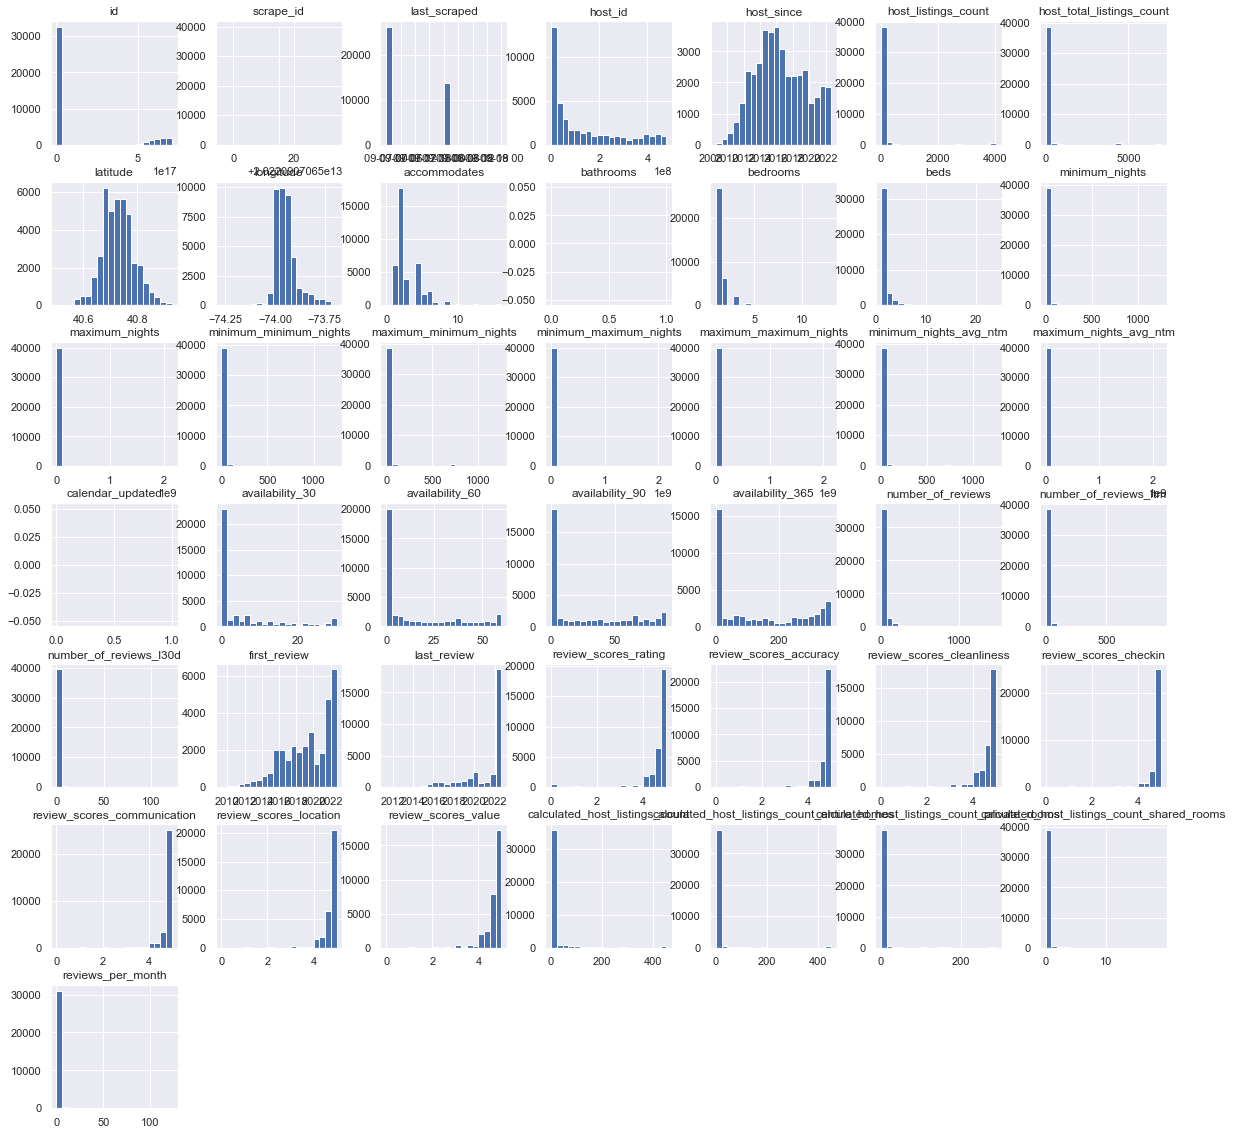

In [5]:
# Plotting the distribution of numerical and boolean categories (matplotlib)
ny_listing_dataset.hist(figsize=(20,20), bins=20);

# Data Cleaning

### As we have made an initial evaluation of which feature of the dataset will be useful for our analysis, we will remove all data which does not serve this requirement.  In addition, all data will be evaluated for its accuracy including the presence of null values which will be replaced with a grouped average for our final analysis.

### To properly represent the underlying values.  We have decided to focus on variables in several dissecting groups to give us the best opportunity to predict listing price.  These groups include host description, property description, location, availability and reviews. As this will give us the best change of determining which how the circumstances of a given listing can predict its list price and how this list price corresponds to market demand through its reviews.

# Variable Justification

## Host Description
### id, source, host_id, host_since, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_listings_count, host_total_listings_count, host_verifications, host_identity_verified, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms.

### These variables provide a description of how the host presented and responded to inquiries pertaining to a given listing and the success of the host as a user of the platform.  This pertains to how the host may have affected listing price.

## Property Description
### property_type, room_type, accommodates, bathrooms_text, bedrooms, beds, amenities, price.

### These variables provide a description of how the property was presented and represent the quality of the property as it was listed.  This pertains to how the property’s features may have affected the listing price.

## Location Description
### neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude.

### These variables provide a description of how the location affected the listing price.

## Availability
### minimum_nights, has_availability, availability_30, availability_60, availability_90, availability_365, instant_bookable.

### These variables provide a description of how the availability of the property affected the listing price.

## Reviews
### number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication,review_scores_location, review_scores_value, reviews_per_month.

### The reviews show if the market is responding well to the listing which includes the evaluation of its price.

In [6]:
# Dropping Unnecessary Columns
ny_listing_dataset = ny_listing_dataset.drop(['listing_url', 'scrape_id', 'last_scraped', 'picture_url', 'host_url',
                                             'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'neighbourhood',
                                             'bathrooms', 'minimum_minimum_nights', 'maximum_minimum_nights', 
                                             'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
                                             'maximum_nights_avg_ntm', 'calendar_updated', 'calendar_last_scraped','host_name',
                                              'host_location','host_about','name','description',
                                              'host_has_profile_pic','license','neighborhood_overview','maximum_nights'], axis=1)


In [7]:
#dropping duplicates
ny_listing_dataset.drop_duplicates()

id           source    host_id host_since  \
0                    2539      city scrape       2787 2008-09-07   
1                    2595      city scrape       2845 2008-09-09   
2                    5121      city scrape       7356 2009-02-03   
3                   45910      city scrape     204539 2010-08-17   
4                    5136      city scrape       7378 2009-02-03   
...                   ...              ...        ...        ...   
39876            43728504  previous scrape   23049030 2014-10-27   
39877            44578886  previous scrape   48009648 2015-11-02   
39878            46355090  previous scrape  371552251 2020-10-11   
39879  698195550745703156      city scrape  151487807 2017-09-21   
39880            48971505  previous scrape      46201 2009-10-16   

       host_response_time host_response_rate host_acceptance_rate  \
0          within an hour               100%                  90%   
1            within a day                75%                  23%   
2          within an hour               100%                 100%   
3          within an hour               100%                  19%   
4                     NaN                NaN                  33%   
...                   ...                ...                  ...   
39876      within an hour               100%                  94%   
39877      within an hour               100%                  96%   
39878      within an hour               100%                  71%   
39879                 NaN                NaN                  NaN   
39880  within a few hours               100%                  46%   

      host_is_superhost  host_listings_count  host_total_listings_count  ...  \
0                     f                  9.0                       12.0  ...   
1                     f                  6.0                        9.0  ...   
2                     t                  2.0                        2.0  ...   
3                     f                  7.0                        7.0  ...   
4                     f                  1.0                        5.0  ...   
...                 ...                  ...                        ...  ...   
39876                 f                  5.0                        9.0  ...   
39877                 t                  1.0                        1.0  ...   
39878                 f                  1.0                        1.0  ...   
39879                 f                  1.0                        1.0  ...   
39880                 f                  3.0                        4.0  ...   

      review_scores_checkin review_scores_communication  \
0                      5.00                        5.00   
1                      4.77                        4.80   
2                      4.91                        4.91   
3                      4.82                        5.00   
4                      5.00                        5.00   
...                     ...                         ...   
39876                  4.97                        5.00   
39877                  5.00                        4.96   
39878                  4.64                        4.36   
39879                   NaN                         NaN   
39880                  4.67                        4.73   

      review_scores_location review_scores_value  instant_bookable  \
0                       4.75                4.88                 f   
1                       4.81                4.40                 f   
2                       4.47                4.52                 f   
3                       4.82                4.55                 f   
4                       4.67                5.00                 f   
...                      ...                 ...               ...   
39876                   4.94                4.88                 f   
39877                   4.81                4.85                 f   
39878                   4.36                4.55                 t   
39879  

In [8]:
#Checking Null value counts column wise (around 15 percent of the dataset)
ny_listing_dataset.isnull().sum()

id                                                  0
source                                              0
host_id                                             0
host_since                                         50
host_response_time                              13548
host_response_rate                              13548
host_acceptance_rate                            11861
host_is_superhost                                  29
host_listings_count                                50
host_total_listings_count                          50
host_verifications                                  0
host_identity_verified                             50
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                

In [9]:
# Removing '$' from the price column and converting it to float
ny_listing_dataset['price'] = ny_listing_dataset['price'].replace('[\$,]', '', regex=True).astype(float)

In [10]:
#covert host_since, first_review, last_review to float days
today = date.today()
date_related_col = ['host_since','first_review', 'last_review']
for date_col in date_related_col:
    ny_listing_dataset[date_col] = pd.to_datetime(today) - ny_listing_dataset[date_col]

In [11]:
# removing % from host accepance & response rate and converting it to float
ny_listing_dataset['host_acceptance_rate'] = ny_listing_dataset['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)
ny_listing_dataset['host_response_rate'] = ny_listing_dataset['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)


In [12]:
#convert rates into floats
ny_listing_dataset['host_acceptance_rate'] = ny_listing_dataset['host_acceptance_rate'].apply(lambda x: round(x / 100, 2))
ny_listing_dataset['host_response_rate'] = ny_listing_dataset['host_response_rate'].apply(lambda x: round(x / 100, 2))


### Making copy of dataset as baseline for detecting and replacing outliers and null values with mechine learning algorithm , feature selection and scsling.  We will select two columns:

#### minimum_nights : to replace outliers 

#### review_score_accuracy : to replace NaN values 

In [13]:
base_dataframe = ny_listing_dataset.copy()

### From the first iteration we have seen that there are lost of rows where column value of minimum nights are above 10, which we detect as outliers as in the Iteration 1, so we will take some sample of the base dataframe to remove those outliers

In [14]:
test_df_min_nights = ny_listing_dataset[ny_listing_dataset.minimum_nights > 10]
test_df_min_nights = test_df_min_nights.sample(n=2000)
test_df_min_nights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1266 to 15597
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype          
---  ------                                        --------------  -----          
 0   id                                            2000 non-null   int64          
 1   source                                        2000 non-null   object         
 2   host_id                                       2000 non-null   int64          
 3   host_since                                    1997 non-null   timedelta64[ns]
 4   host_response_time                            900 non-null    object         
 5   host_response_rate                            900 non-null    float64        
 6   host_acceptance_rate                          981 non-null    float64        
 7   host_is_superhost                             1998 non-null   object         
 8   host_listings_count                           1997 non

In [15]:
test_df_review_score_accuracy = base_dataframe[base_dataframe['review_scores_accuracy'].isna()].sample(2000)
test_df_review_score_accuracy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 32377 to 33043
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype          
---  ------                                        --------------  -----          
 0   id                                            2000 non-null   int64          
 1   source                                        2000 non-null   object         
 2   host_id                                       2000 non-null   int64          
 3   host_since                                    1989 non-null   timedelta64[ns]
 4   host_response_time                            1037 non-null   object         
 5   host_response_rate                            1037 non-null   float64        
 6   host_acceptance_rate                          1111 non-null   float64        
 7   host_is_superhost                             1997 non-null   object         
 8   host_listings_count                           1989 no

### Data Cleaning continued on the original dataset; this will be used as a traditional comparison point.  We will first fill cell with missing values before assessing the state of outliers one feature at a time with its own individual centrality measurement.

### For most of these values we can assume that the missing value represent the minimum participating amount while for other a best assumption might be its centrality measure in this case mean. 

### An example of this can be a missing number of rooms where we can assume the minimum participating values as the number of rooms is a significant marketing feature. This serves as a method of allowing the entry to participate without adjusting the overall mean.

In [16]:
#Fill NaN cells with O for numeric & timedata columns
ny_listing_dataset.update(ny_listing_dataset.select_dtypes('timedelta64[ns]').fillna(pd.Timedelta(seconds=0)))
ny_listing_dataset.update(ny_listing_dataset.select_dtypes(include=[int, np.float32, np.float64]).fillna(0))

In [17]:
#updating host_response_time with Not Mentioned where is NaN
ny_listing_dataset['host_response_time'] = ny_listing_dataset['host_response_time'].fillna('Not Mentioned')

In [18]:
#checking where host_identity_verified column has empty value
ny_listing_dataset[ny_listing_dataset.host_identity_verified.isna()]
#filling the null values of host_identity_verified column with 'unconfirmed'
ny_listing_dataset['host_identity_verified'] = ny_listing_dataset['host_identity_verified'].fillna('unconfirmed')

In [19]:
# checking where host_is_superhost column has empty value
ny_listing_dataset[ny_listing_dataset.host_is_superhost.isna()]
#filling the null values of host_is_superhost column with 'unconfirmed'
ny_listing_dataset['host_is_superhost'] = ny_listing_dataset['host_is_superhost'].fillna('unconfirmed')

In [20]:
#room type with most common bedrooms count
ny_listing_dataset.groupby(['room_type'])['bedrooms'].agg(pd.Series.mode)

room_type
Entire home/apt    1.0
Hotel room         1.0
Private room       1.0
Shared room        1.0
Name: bedrooms, dtype: float64

### As we can see all room type has most common data 1 bed for each group, so we will fill NaN with 1.

In [21]:
#assigning 1 to the missing beds rows
ny_listing_dataset['beds'] = ny_listing_dataset['beds'].fillna(1)

In [22]:
#room type with most common bathroom text
ny_listing_dataset.groupby(['room_type'])['bathrooms_text'].agg(pd.Series.mode)

room_type
Entire home/apt            1 bath
Hotel room         1 private bath
Private room        1 shared bath
Shared room         1 shared bath
Name: bathrooms_text, dtype: object

### From the above we can see most common bathroom type for each room type, so we will fill NaN bathroom according to the room type.  We will use this mean to fill in for missing values to keep the relative avlue of the listing according to its features.

In [23]:
#Assigning most common bathroom_text with room type most common value
ny_listing_dataset['bathrooms_text'] = np.where((ny_listing_dataset['room_type'] == 'Entire home/apt') & ny_listing_dataset['bathrooms_text'].isna(), '1 bath', ny_listing_dataset['bathrooms_text'])
ny_listing_dataset['bathrooms_text'] = np.where((ny_listing_dataset['room_type'] == 'Hotel room') & ny_listing_dataset['bathrooms_text'].isna(), '1 private bath', ny_listing_dataset['bathrooms_text'])
ny_listing_dataset['bathrooms_text'] = np.where((ny_listing_dataset['room_type'] == 'Private room') & ny_listing_dataset['bathrooms_text'].isna(), '1 shared bath', ny_listing_dataset['bathrooms_text'])
ny_listing_dataset['bathrooms_text'] = np.where((ny_listing_dataset['room_type'] == 'Shared room') & ny_listing_dataset['bathrooms_text'].isna(), '1 shared bath', ny_listing_dataset['bathrooms_text'])

In [24]:
#Checking null value count column wise
ny_listing_dataset.isnull().sum()

id                                              0
source                                          0
host_id                                         0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_identity_verified                          0
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms_text                                  0


# Assessing Outliers

### In this section we will be evluating for outliers and persorming data science procedures to reduce thier impact on the dataset.  In order to do this we will be performing some introductory plots to be able to closly monotor the state of the data and the range of its varibles.

## Removing Outliers from Minimum Night Stay

### For outlier detection we use **Interquartile Range Method**

In [25]:
#checking min and max value from minimum nights
ny_listing_dataset['minimum_nights'].min(), ny_listing_dataset['minimum_nights'].max()

(1, 1250)

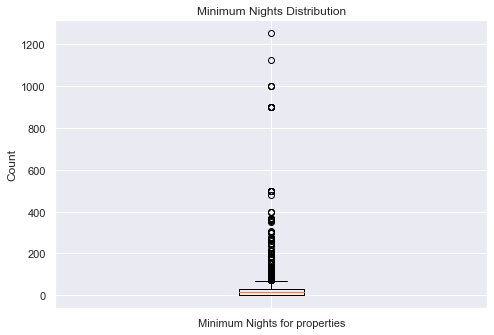

In [26]:
#taking minimum nights to a list
min_nights = ny_listing_dataset['minimum_nights'].to_list()
#figure plotting
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
label = ['Minimum Nights for properties']
bp = ax.boxplot(min_nights, labels = label)
ax.set_ylabel('Count')
ax.set_title('Minimum Nights Distribution')
plt.show()

In [27]:
#describe the minimum nights column
ny_listing_dataset.minimum_nights.describe()

count    39881.000000
mean        19.131742
std         31.432778
min          1.000000
25%          2.000000
50%         14.000000
75%         30.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [28]:
#Interquartile Range Method
q3 = np.percentile(ny_listing_dataset['minimum_nights'], 75)
q1 = np.percentile(ny_listing_dataset['minimum_nights'], 25)
iqr = q3 - q1
outlier = q3 + (1.5 * iqr)


#Clean data
cond_1, cond_2 = ny_listing_dataset.minimum_nights > 0, ny_listing_dataset.minimum_nights < outlier
ny_listing_dataset = ny_listing_dataset[cond_1 & cond_2]

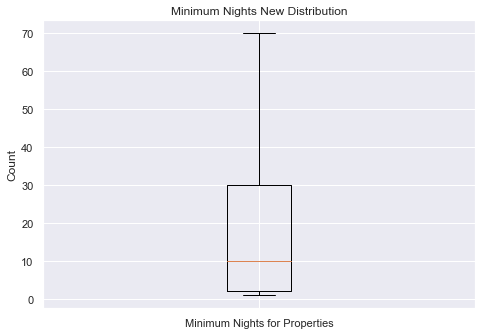

In [29]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

label = ['Minimum Nights for Properties']
bp = ax.boxplot(ny_listing_dataset.minimum_nights, labels = label)
ax.set_ylabel('Count')
ax.set_title('Minimum Nights New Distribution')
plt.show()

In [30]:
ny_listing_dataset.minimum_nights.describe()

count    39013.000000
mean        16.163689
std         13.992151
min          1.000000
25%          2.000000
50%         10.000000
75%         30.000000
max         70.000000
Name: minimum_nights, dtype: float64

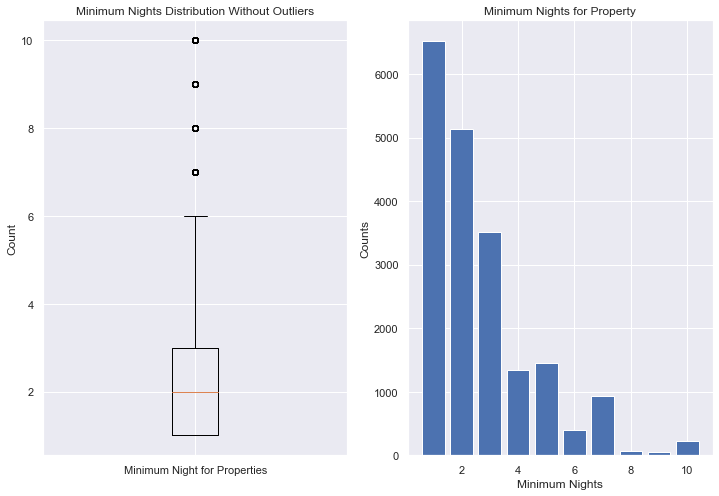

In [31]:
# Removing Outliers
ny_listing_dataset = ny_listing_dataset[ny_listing_dataset.minimum_nights <= 10]
ny_listing_dataset.minimum_nights = list(map(int, ny_listing_dataset.minimum_nights))

fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs=axs.flatten() 

box_val = [ny_listing_dataset.minimum_nights]
label = ['Minimum Night for Properties']
axs[0].boxplot(box_val, labels = label)
axs[0].set_ylabel('Count')
axs[0].set_title('Minimum Nights Distribution Without Outliers')

counts = ny_listing_dataset['minimum_nights'].value_counts()
axs[1].bar(counts.index, counts.values)
axs[1].set_xlabel('Minimum Nights')
axs[1].set_ylabel('Counts')
axs[1].set_title('Minimum Nights for Property')

plt.show()

**At first, Our minimum nights were (1 - minimum value, 1250 - max value). We can tell that, 1250 is definately is an outlier as well as anyvalue more than 10 can be considered as outlired as most of the values were in this range.**

### Room Type

In [32]:
# room type counts
ny_listing_dataset['room_type'].value_counts()

Entire home/apt    11006
Private room        8160
Shared room          284
Hotel room           163
Name: room_type, dtype: int64

**We can see that, in our dataset, most common room type is Entire home/apt, after that Private room, then Shared room and after that hotel room. From here we can see the available options for selecting room while choosing airbnb in New York.**

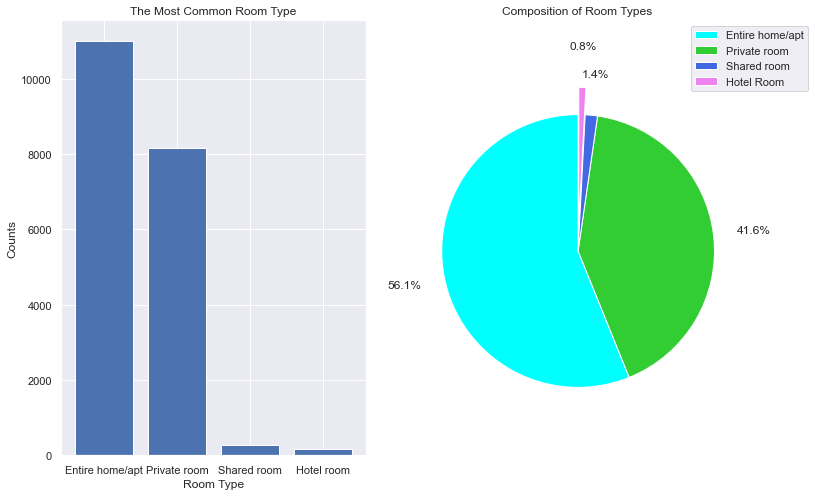

In [33]:
counts = ny_listing_dataset['room_type'].value_counts()
df_room_type = pd.DataFrame(counts)
df_room_type.rename(columns={'room_type': 'counts'}, inplace=True)

fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs=axs.flatten() 

axs[0].bar(df_room_type.index, df_room_type.counts)
axs[0].set_xlabel('Room Type')
axs[0].set_ylabel('Counts') 
axs[0].set_title('The Most Common Room Type')

labels = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel Room']
sizes = df_room_type['counts'].tolist()
color = ['cyan', 'limegreen', 'royalblue', 'violet']
axs[1].pie(sizes,
          explode = (0, 0, 0, 0.2),
          startangle =90,
          colors = color,
          autopct = '%1.1f%%',
          pctdistance=1.3
          )
axs[1].axis('equal')
axs[1].set_title('Composition of Room Types ')
axs[1].legend(labels, bbox_to_anchor=(0.85, 1))

plt.show()

### From the Graph, we can see that, only 0.5% rooms from the listing are Hotel room, 1.4% are Shared room. We can say that these are the least picked room in NY, while Entire Home/Apt is the most listed properties with 57.1% and Private rooms are second with 41%.

#### Neighbour Group

In [34]:
#creating a new dataframe with neighbourhood with respect to room tyep
room_type_with_neighbour_group = ny_listing_dataset.filter(['neighbourhood_group_cleansed','room_type'], axis=1)

#generating pivot table with the newly created pivot table
pivot_table = room_type_with_neighbour_group.pivot_table(index = 'room_type',
                                                        columns = 'neighbourhood_group_cleansed',
                                                        values = 'neighbourhood_group_cleansed',
                                                        aggfunc='size',
                                                        fill_value=0 #for filling nan values in pivot
                                                        )
pivot_table


neighbourhood_group_cleansed  Bronx  Brooklyn  Manhattan  Queens  \
room_type                                                          
Entire home/apt                 598      4461       3809    1910   
Hotel room                        0         7        148       8   
Private room                    555      2904       2851    1735   
Shared room                      30        70        125      58   

neighbourhood_group_cleansed  Staten Island  
room_type                                    
Entire home/apt                         228  
Hotel room                                0  
Private room                            115  
Shared room                               1

### From the table, we can see the availability of each room type in 5 Neighbour groop for New York. As usual here we are also seeing the same pattern for the roomtype like before. But here we can see the Manhattan have the most hotels rooms availabe as Airbnb in NY while Staten Island have no hotel rooms lited in Airbnb. Also we can see the Staten Island have the least properties in the Airbnb, On the other hand, Manhattan with the most airbnb properties listed in the site. 

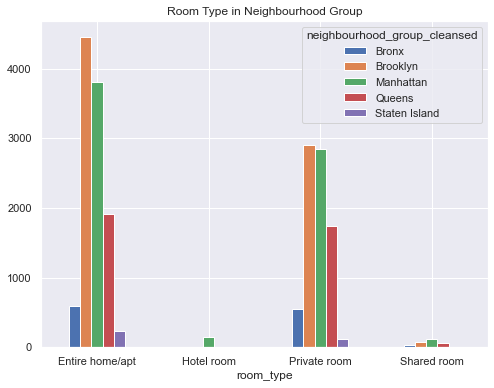

In [35]:
#Plotting the pivot tabel in the bar chart for visualization
pivot_table.plot(kind= 'bar',
                 figsize = (8,6),
                 title = 'Room Type in Neighbourhood Group',
                 rot=0)
plt.show()

### From the Graph we can see that, Manhattan has most Entire Home/Apt as the listed properties while Private Room is much popular in Brooklyn.

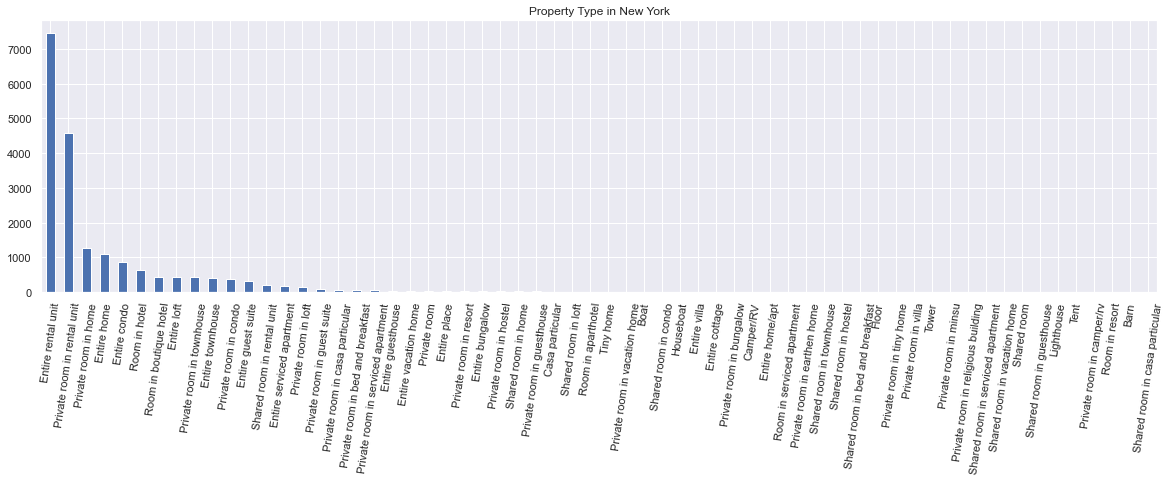

In [36]:
# Property type mentioned in NY Airbnb Dataset visualization
plt.figure(figsize=(20,5))
ny_listing_dataset['property_type'].value_counts().plot(kind='bar')
plt.title('Property Type in New York')
plt.xticks(rotation=82)
plt.show()

### We can see the all the available property type listed in New York Airbnb sites, here also enter rental unit and private rooms are listed as most property type

In [37]:
#checking how many types of property listed in the dataset
print(f'New York Airbnb Dataset has total {len(ny_listing_dataset.property_type.unique())} types of property')

New York Airbnb Dataset has total 62 types of property


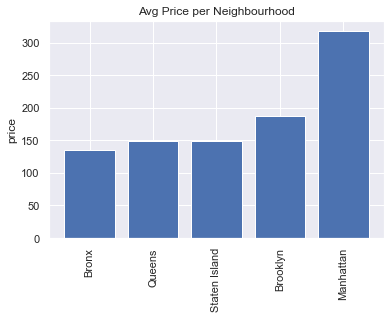

In [38]:
# Average Price per Neighbourhood Group
price_temp=ny_listing_dataset['price'].groupby(ny_listing_dataset['neighbourhood_group_cleansed']).mean().sort_values(ascending=True)
neighbourhoods = price_temp.index
avg_price = price_temp.values

#plotting the avg price per neighbourhood 
price_plot = plt.bar(neighbourhoods, avg_price) 
plt.ylabel('price')
plt.title('Avg Price per Neighbourhood')
plt.xticks(range(len(neighbourhoods)),rotation='vertical')
plt.show()

### From the graph we can see that, All 4 neighbours (Bronx, Queens, Staten Island, Brooklyn) all have avg price for price between 100 USD to 200 USD where Manhattan avg price for room is more than 250 USD. So all the properties listed in NY, Manhattan properties have the highest price for the listing while Bronx with the least. 

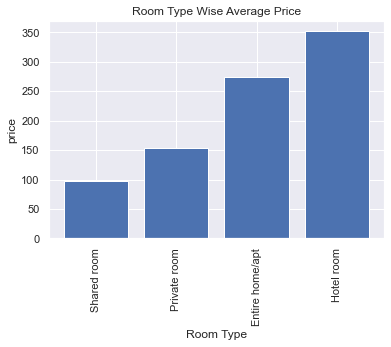

In [39]:
#Avg price per room type
price_room_wise = ny_listing_dataset['price'].groupby(ny_listing_dataset['room_type']).mean().sort_values(ascending=True)
roomtype = price_room_wise.index
avg_price_roomwise = price_room_wise.values

rwp_plot = plt.bar(roomtype, avg_price_roomwise)
plt.ylabel('price')
plt.xlabel('Room Type')
plt.title('Room Type Wise Average Price')
plt.xticks(range(len(roomtype)), rotation='vertical')
plt.show()


### Even though, the Hotel room have the least entries in the dataset of NY Airbnb but it has the highest avg. price for booking, whereas Shared room and Private room can be rented at almost same price. But Entire Home/Appartment is almost double price of shared room and private room.

In [40]:
agg_dic = {'price': ['mean', 'std', 'median']}
ny_listing_dataset.groupby('room_type').agg(agg_dic)

price                   
                       mean         std median
room_type                                     
Entire home/apt  274.831936  305.989543  200.0
Hotel room       351.687117  239.867724  307.0
Private room     153.305882  376.832943   90.0
Shared room       98.021127  142.741085   70.0

### From the table, we can see the median value for Private room & Shared room is less than 90 USD where Entire home/apt can be rented at median value of 200 USD and hote rooms at an astoning 307 USD.

In [41]:
ny_listing_dataset.groupby('neighbourhood_group_cleansed').agg(agg_dic)

price                   
                                    mean         std median
neighbourhood_group_cleansed                               
Bronx                         135.120879  316.798590   96.0
Brooklyn                      187.445310  223.891623  143.0
Manhattan                     317.713874  480.620152  214.0
Queens                        148.738615  137.751883  110.0
Staten Island                 149.546512  202.580648  112.0

### From the table we can see that, Medain price for renting an airbnb in NY is cheapest at Bronx with 96 USD where Manhattan is the highest with 214 USD.

# Conclusions (Iteration 1)

### In this evaluation we have given an overview of the datasets containing features and their possible use in contributing and predicting listing cost.  In the data cleaning portion of this project, we have interacted with the data in several ways to ensure that the remaining information is as unchanged as possible from its accurate and completer form.  To accomplish this, we have performed the following procedures.

##### * Removed excess information and converted several columns to the correct data type which includes the price, host_since, first_review, last_review, host acceptance, response rate.

##### *  Cells which did not contain a value which were originally marked NaN were replaced with zero to denote a missing measurement.

##### *  The data columns were then evaluated for outliers and assessed as to their contribution to the dataset, if present these outliers were removed by quantile functions.

### After these steps were completed, introductory graphs were compelled to show the underlying structure of the data.  In this case our evaluation mainly considered the neighbourhood_group and room_type variables to reflect how the largest inner sets of the data present themselves.


# Iteration 2

## Background Story


### Airbnb has been changing hospitality and tourism around the world and as the rise of internet platforms, mobile phones and changing technology has revolutionized this trend on a large scale. As per New York Times, Airbnb has been among the biggest player in the short term rental market and due to its rapid growth led to turn residential neighbourhood into tourist zones.

### Currently Airbnb offers price prediction in two ways
1. Price Tips

2. Smart Pricing


## Aim of the project

### The main of the project is to predict the price of New York Airbnb price. Also find the attributes which has significant impact on pricing. Also use different ML models and finds which one is best.


## Problem Statement

### Even though Airbnb suggest price for properties for hosts, still it's a daunting task for host to set the right price for their property(ies) considering the amount of competions in the market. Airbnb losses 45% of revenue due to inappropriate pricing of the listing.

### Encoding Features

In [42]:
#converting  boolean values to 0 and 1
boolean_columns = ['host_is_superhost','host_identity_verified','has_availability','instant_bookable']

for boolean_col in boolean_columns:
    ny_listing_dataset[boolean_col].replace({'t|T': 1, 'f|F': 0}, regex=True, inplace=True)

ny_listing_dataset[boolean_columns].head()

host_is_superhost  host_identity_verified  has_availability  \
6                   1                       1                 1   
7                   0                       0                 1   
8                   0                       1                 1   
9                   1                       1                 1   
10                  1                       1                 1   

    instant_bookable  
6                  0  
7                  0  
8                  0  
9                  0  
10                 0

In [43]:
#host verifications
ny_listing_dataset.host_verifications.replace(r'[\[\]\"\'\.]', '', regex=True, inplace=True)
ny_listing_dataset.host_verifications.str.lower()

6        email, phone, work_email
7                    email, phone
8                    email, phone
9        email, phone, work_email
10       email, phone, work_email
                   ...           
39875                email, phone
39876    email, phone, work_email
39877    email, phone, work_email
39878                       phone
39880                email, phone
Name: host_verifications, Length: 19613, dtype: object

In [44]:
host_verifications = ny_listing_dataset.host_verifications.str.split(',', expand=True)

# For each col, extract the unique amenities
host_verifications_uniques = []
for col in host_verifications.columns:
    host_verifications_uniques += list(host_verifications[col].unique())


for i in range(len(host_verifications_uniques)):
    if host_verifications_uniques[i] == '':
        host_verifications_uniques[i] = 'not_verified'
    elif host_verifications_uniques[i] == 'None':
        host_verifications_uniques[i] = 'not_verified'   

print(host_verifications_uniques)

#removing duplicates from list
host_verifications_uniques = [*set(host_verifications_uniques)]
host_verifications_uniques

#removing None from list
res = []
for val in host_verifications_uniques:
    if val != None :
        res.append(val)

print(res)

#removing white spaces from the list
rs = [i.strip() for i in res]
rs = [*set(rs)]
print(rs)

['email', 'phone', 'not_verified', 'not_verified', ' phone', None, ' work_email', ' work_email', None]
['phone', 'not_verified', ' phone', 'email', ' work_email']
['phone', 'work_email', 'not_verified', 'email']


In [45]:
#Removing Brackets and Special Characters from ammenities column
ny_listing_dataset.amenities.replace(r'[\[\]\"\'\.]', '', regex=True, inplace=True)
ny_listing_dataset.amenities.replace(to_replace=r"\\u", value=" ", regex=True, inplace=True)
ny_listing_dataset.amenities.replace(to_replace=r"\\", value=" ", regex=True, inplace=True)
ny_listing_dataset.amenities.str.lower()

ny_listing_dataset['amenities_count'] = ny_listing_dataset['amenities'].str.split(',').str.len()
ny_listing_dataset[['amenities','amenities_count']].head()

amenities  amenities_count
6   First aid kit, Coffee maker, Gym, Long term st...               27
7   Body soap, Microwave, Laundromat nearby, Mini ...               25
8   Essentials, Oven, Cable TV, Refrigerator, Micr...               18
9   Coffee maker, Gym, Long term stays allowed, Ca...               27
10  First aid kit, Coffee maker, Gym, Long term st...               28

In [46]:
ny_listing_dataset.property_type.unique()

array(['Room in boutique hotel', 'Private room in rental unit',
       'Private room in townhouse', 'Private room in home',
       'Entire rental unit', 'Private room in loft', 'Entire guest suite',
       'Entire loft', 'Private room in guest suite',
       'Private room in condo', 'Entire serviced apartment',
       'Entire home', 'Entire townhouse', 'Entire condo',
       'Private room in bed and breakfast', 'Private room',
       'Shared room in rental unit', 'Private room in guesthouse', 'Boat',
       'Room in aparthotel', 'Entire place',
       'Private room in religious building', 'Entire cottage',
       'Private room in serviced apartment', 'Entire guesthouse',
       'Shared room in loft', 'Tiny home', 'Entire bungalow',
       'Shared room in condo', 'Private room in casa particular',
       'Room in hotel', 'Shared room in townhouse',
       'Private room in hostel', 'Floor', 'Houseboat',
       'Room in serviced apartment', 'Entire villa',
       'Private room in villa', 

In [47]:
#replacing categories of houses/hotels/apartments
ny_listing_dataset = ny_listing_dataset.replace({
                            'Private room in rental unit' : 'private_room',
                            'Entire rental unit' : 'house',
                            'Entire townhouse' : 'house',
                            'Room in boutique hotel' : 'hotel',
                            'Private room in bed and breakfast' : 'private_room', 
                            'Private room in townhouse' : 'private_room',
                            'Private room in home' : 'private_room', 
                            'Private room in condo' : 'private_room',
                            'Private room in loft' : 'private_room', 
                            'Entire guesthouse' : 'house', 
                            'Entire guest suite' : 'house',
                            'Entire loft' : 'house', 
                            'Private room in guest suite' : 'private_room',
                            'Entire serviced apartment' : 'apartment', 
                            'Entire condo' : 'house', 
                            'Entire home' : 'house',
                            'Shared room in loft' : 'shared_room', 
                            'Shared room in rental unit' : 'shared_room',
                            'Private room in houseboat' :  'private_room', 
                            'Shared room in home' : 'shared_room', 
                            'Private room' : 'private_room',
                            'Entire place' : 'house', 
                            'Private room in guesthouse' : 'private_room', 
                            'Boat' : 'other',
                            'Room in aparthotel' : 'apartment', 
                            'Room in serviced apartment' : 'apartment',
                            'Private room in religious building' : 'private_room', 
                            'Entire cottage' : 'house',
                            'Private room in serviced apartment' : 'private_room', 
                            'Cave' : 'other', 
                            'Tiny home' : 'house',
                            'Entire bungalow' : 'house', 
                            'Shared room in condo' : 'shared_room', 
                            'Floor' : 'private_room',
                            'Private room in hostel' : 'private_room', 
                            'Private room in casa particular' : 'private_room',
                            'Room in hotel' : 'hotel', 
                            'Shared room in townhouse' : 'shared_room',
                            'Private room in bungalow' : 'private_room', 
                            'Houseboat' : 'other', 
                            'Private room in resort' : 'private_room',
                            'Entire villa' : 'house', 
                            'Shared room in guest suite' : 'shared_room',
                            'Private room in villa' : 'private_room', 
                            'Shared room in floor' : 'shared_room',
                            'Private room in floor' : 'private_room', 
                            'Entire bed and breakfast' : 'house',
                            'Entire home/apt' : 'house', 
                            'Private room in tent' : 'private_room',
                            'Private room in in-law' : 'private_room', 
                            'Shared room in hostel' : 'shared_room',
                            'Room in resort' : 'private_room', 
                            'Shared room in guesthouse' : 'shared_room',
                            'Shared room in bed and breakfast' : 'shared_room', 
                            'Private room in farm stay' : 'private_room',
                            'Private room in dorm' : 'private_room', 
                            'Room in bed and breakfast' : 'private_room',
                            'Private room in tiny home' : 'private_room', 
                            'Shared room in serviced apartment' : 'shared_room',
                            'Shared room in bungalow' : 'shared_room', 
                            'Private room in earthen home' : 'private_room',
                            'Private room in barn' : 'private_room', 
                            'Private room in cottage' : 'private_room', 
                            'Lighthouse' : 'house',
                            'Private room in train' : 'private_room', 
                            'Barn' : 'house', 
                            'Private room in lighthouse' : 'private_room',
                            'Casa particular' : 'house', 
                            'Camper/RV' : 'other', 
                            'Private room in camper/rv' : 'private_room',
                            'Private room in vacation home' : 'private_room', 
                            'Castle' : 'other', 
                            'Tent' : 'other', 
                            'Tower' : 'other',
                            'Entire vacation home' : 'house', 
                            'Shared room in vacation home' : 'shared_room',
                            'Private room in minsu' : 'private_room', 
                            'Shared room' : 'shared_room',
                            'Shared room in casa particular' : 'shared_room'  
                        })

In [48]:
ny_listing_dataset.property_type.unique()

array(['hotel', 'private_room', 'house', 'apartment', 'shared_room',
       'other'], dtype=object)

In [49]:
ny_listing_dataset.room_type.unique()

array(['Hotel room', 'private_room', 'house', 'shared_room'], dtype=object)

In [50]:
ny_listing_dataset = ny_listing_dataset.replace({
    'Hotel room' : 'hotel_room'
})

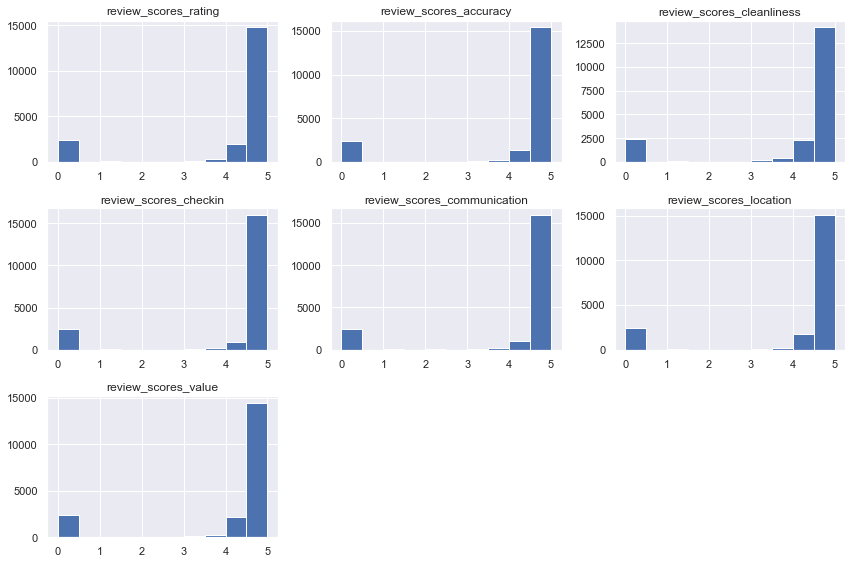

In [51]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(ny_listing_dataset.columns[ny_listing_dataset.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    ny_listing_dataset[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [52]:
#Plots a simple bar chart of the counts of true and false categories in the column specified,
#next to a bar chart of the median price for each category.
#A t-test P-value is calculated.
#A figure size can optionally be specified.

def pricewise_boolean_value_plot(df, col, figsize=(8,3)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    
    df.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    df.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price ($)')
    ax2.set_xlabel('')
    plt.show()
    
    cat0 = df.loc[df[col] == 0.0].price
    cat1 = df.loc[df[col] == 1.0].price
    tstatistic, pvalue = ttest_ind(cat0, cat1)
    
    cat0_median =(df.loc[df[col] == 0.0].price.median())
    cat1_median = (df.loc[df[col] == 1.0].price.median())
    cat0_count =(df.loc[df[col] == 0.0].price.count())
    cat1_count =(df.loc[df[col] == 1.0].price.count())
    print("")
    print('P-value is %6.2e' % pvalue)
    print("There are " + str(cat0_count) + " without " + str(col) + ", with a median price of " + str(cat0_median))
    print("There are " + str(cat1_count) + " with "  + str(col) + ", with a median price of " + str(cat1_median))

    # Bonferroni correction
    if pvalue < (0.05/106):
        print("Effect is significant!")
    
    df.groupby(col).price
    return pvalue

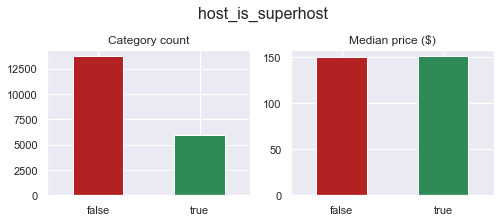


P-value is 7.71e-03
There are 13692 without host_is_superhost, with a median price of 150.0
There are 5921 with host_is_superhost, with a median price of 151.0
0    0.698108
1    0.301892
Name: host_is_superhost, dtype: float64


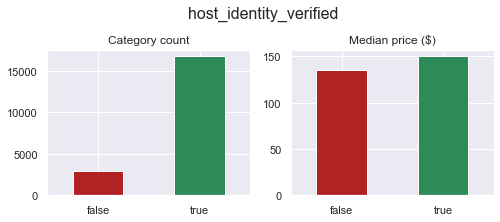


P-value is 2.49e-04
There are 2884 without host_identity_verified, with a median price of 135.0
There are 16729 with host_identity_verified, with a median price of 150.0
Effect is significant!
1    0.852955
0    0.147045
Name: host_identity_verified, dtype: float64


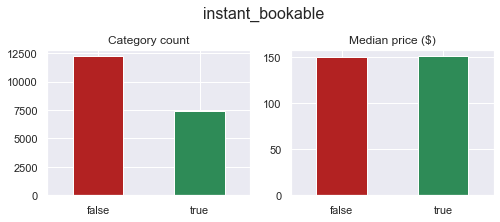


P-value is 5.51e-05
There are 12204 without instant_bookable, with a median price of 150.0
There are 7409 with instant_bookable, with a median price of 151.0
Effect is significant!
0    0.62224
1    0.37776
Name: instant_bookable, dtype: float64


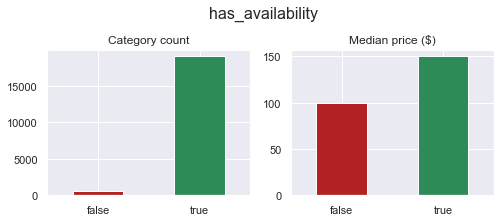


P-value is 5.97e-05
There are 588 without has_availability, with a median price of 100.0
There are 19025 with has_availability, with a median price of 150.0
Effect is significant!
1    0.97002
0    0.02998
Name: has_availability, dtype: float64


In [53]:
superhost = pricewise_boolean_value_plot(ny_listing_dataset, 'host_is_superhost')
print(ny_listing_dataset.host_is_superhost.value_counts(normalize=True))

host_identity_verification = pricewise_boolean_value_plot(ny_listing_dataset, 'host_identity_verified')
print(ny_listing_dataset.host_identity_verified.value_counts(normalize=True))

instant_booking = pricewise_boolean_value_plot(ny_listing_dataset, 'instant_bookable')
print(ny_listing_dataset.instant_bookable.value_counts(normalize=True))

has_availability = pricewise_boolean_value_plot(ny_listing_dataset, 'has_availability')
print(ny_listing_dataset.has_availability.value_counts(normalize=True))

In [54]:
ny_listing_dataset.bathrooms_text.unique()

array(['1 private bath', '1 bath', '1.5 shared baths', '1 shared bath',
       '1.5 baths', '2 shared baths', 'Shared half-bath', '2 baths',
       'Half-bath', '2.5 baths', '0 shared baths', 'Private half-bath',
       '4 baths', '5.5 baths', '4.5 baths', '3.5 baths',
       '2.5 shared baths', '0 baths', '3 baths', '3 shared baths',
       '5 baths', '4 shared baths', '3.5 shared baths',
       '4.5 shared baths', '6 baths', '7 baths', '6.5 baths',
       '6 shared baths'], dtype=object)

In [55]:
ny_listing_dataset['bathroom_quantity'] = ny_listing_dataset['bathrooms_text'].str.split(' ', expand=True)[0]
ny_listing_dataset['bathroom_type'] = ny_listing_dataset['bathrooms_text'].str.split(' ', expand=True)[1]


ny_listing_dataset[['bathrooms_text','bathroom_quantity','bathroom_type']].head()

bathrooms_text bathroom_quantity bathroom_type
6     1 private bath                 1       private
7             1 bath                 1          bath
8   1.5 shared baths               1.5        shared
9     1 private bath                 1       private
10    1 private bath                 1       private

In [56]:
ny_listing_dataset.bathroom_quantity.unique()

array(['1', '1.5', '2', 'Shared', 'Half-bath', '2.5', '0', 'Private', '4',
       '5.5', '4.5', '3.5', '3', '5', '6', '7', '6.5'], dtype=object)

In [57]:
ny_listing_dataset.bathroom_quantity.replace({
    'Shared' : '1',
    'Half-bath' : '0.5',
    'Private' : '1'
}, inplace=True)

In [58]:
#converting bathroom_quantity from string to float as all values are float type
ny_listing_dataset['bathroom_quantity'] = ny_listing_dataset['bathroom_quantity'].astype(float)

In [59]:
ny_listing_dataset.bathroom_type.unique()

array(['private', 'bath', 'shared', 'baths', 'half-bath', None],
      dtype=object)

In [60]:
#replacing the None Values in dataset
ny_listing_dataset.replace(to_replace=[None], value='bath', inplace=True)

In [61]:
#in bathroom_type column baths and bath are same, so replacing them so that we get one original label
ny_listing_dataset.bathroom_type.replace({
    'baths' : 'bath'
}, inplace=True)
ny_listing_dataset.bathroom_type.unique()

array(['private', 'bath', 'shared', 'half-bath'], dtype=object)

In [62]:
#removing columns bathroom_text & amenities
#bathroom_text - we have created new columns from this bathroom_quantity & bathroom_type
#amenities - we have represented the values by count in newly created amenities_count column
ny_listing_dataset.drop(['bathrooms_text','amenities'], axis=1, inplace=True)

In [63]:
#host_verifications
host_verifications_en = pd.DataFrame()
for verification_method in rs:
    host_verifications_en[verification_method] = ny_listing_dataset.host_verifications.str.contains(verification_method, regex=False)

# Rename the columns with prefix amenity_
host_verifications_en.columns = [f"host_verifications_{col}" for col in host_verifications_en.columns]

host_verifications_en.head()

host_verifications_phone  host_verifications_work_email  \
6                       True                           True   
7                       True                          False   
8                       True                          False   
9                       True                           True   
10                      True                           True   

    host_verifications_not_verified  host_verifications_email  
6                             False                      True  
7                             False                      True  
8                             False                      True  
9                             False                      True  
10                            False                      True

In [64]:
host_verifications_en = host_verifications_en.replace({
    True : 1,
    False : 0
})
host_verifications_en.head()

host_verifications_phone  host_verifications_work_email  \
6                          1                              1   
7                          1                              0   
8                          1                              0   
9                          1                              1   
10                         1                              1   

    host_verifications_not_verified  host_verifications_email  
6                                 0                         1  
7                                 0                         1  
8                                 0                         1  
9                                 0                         1  
10                                0                         1

In [65]:
#concatenating dataframes
ny_listing_dataset = pd.concat([ny_listing_dataset, host_verifications_en], axis=1)

#dropping host_verification columns from dataset
ny_listing_dataset = ny_listing_dataset.drop('host_verifications', axis=1)

ny_listing_dataset.head()

id       source  host_id host_since  host_response_time  \
6   77765  city scrape   417504  4297 days      within an hour   
7    5178  city scrape     8967  5025 days  within a few hours   
8   80493  city scrape   434987  4288 days      within an hour   
9   80684  city scrape   417504  4297 days      within an hour   
10  80700  city scrape   417504  4297 days      within an hour   

    host_response_rate  host_acceptance_rate  host_is_superhost  \
6                 0.99                  0.98                  1   
7                 1.00                  1.00                  0   
8                 1.00                  0.86                  0   
9                 0.99                  0.98                  1   
10                0.99                  0.98                  1   

    host_listings_count  host_total_listings_count  ...  \
6                  30.0                       40.0  ...   
7                   1.0                        1.0  ...   
8                   1.0                        1.0  ...   
9                  30.0                       40.0  ...   
10                 30.0                       40.0  ...   

    calculated_host_listings_count_private_rooms  \
6                                             10   
7                                              1   
8                                              1   
9                                             10   
10                                            10   

   calculated_host_listings_count_shared_rooms reviews_per_month  \
6                                            0              0.30   
7                                            0              3.39   
8                                            0              1.49   
9                                            0              0.08   
10                                           0              0.07   

    amenities_count  bathroom_quantity bathroom_type host_verifications_phone  \
6                27                1.0       private                        1   
7                25                1.0          bath                        1   
8                18                1.5        shared                        1   
9                27                1.0       private                        1   
10               28                1.0       private                        1   

    host_verifications_work_email  host_verifications_not_verified  \
6                               1                                0   
7                               0                                0   
8                               0                                0   
9                               1                                0   
10                              1                                0   

    host_verifications_email  
6                          1  
7                          1  
8                          1  
9                          1  
10                         1  

[5 rows x 52 columns]

In [66]:
le = LabelEncoder()
ny_listing_dataset['source'] = le.fit_transform(ny_listing_dataset['source'])
ny_listing_dataset['neighbourhood_cleansed'] = le.fit_transform(ny_listing_dataset['neighbourhood_cleansed'])
ny_listing_dataset['neighbourhood_group_cleansed'] = le.fit_transform(ny_listing_dataset['neighbourhood_group_cleansed'])
ny_listing_dataset['property_type'] = le.fit_transform(ny_listing_dataset['property_type'])

# ordinal encoding methods
ny_listing_dataset = ny_listing_dataset.replace({
    'Not Mentioned': 0.0, 
    'within an hour': 1.0,
    'within a few hours': 2.0,
    'within a day': 3.0,
    'a few days or more': 4.0
})

ny_listing_dataset.head()

id  source  host_id host_since  host_response_time  host_response_rate  \
6   77765       0   417504  4297 days                 1.0                0.99   
7    5178       0     8967  5025 days                 2.0                1.00   
8   80493       0   434987  4288 days                 1.0                1.00   
9   80684       0   417504  4297 days                 1.0                0.99   
10  80700       0   417504  4297 days                 1.0                0.99   

    host_acceptance_rate  host_is_superhost  host_listings_count  \
6                   0.98                  1                 30.0   
7                   1.00                  0                  1.0   
8                   0.86                  0                  1.0   
9                   0.98                  1                 30.0   
10                  0.98                  1                 30.0   

    host_total_listings_count  ...  \
6                        40.0  ...   
7                         1.0  ...   
8                         1.0  ...   
9                        40.0  ...   
10                       40.0  ...   

    calculated_host_listings_count_private_rooms  \
6                                             10   
7                                              1   
8                                              1   
9                                             10   
10                                            10   

    calculated_host_listings_count_shared_rooms  reviews_per_month  \
6                                             0               0.30   
7                                             0               3.39   
8                                             0               1.49   
9                                             0               0.08   
10                                            0               0.07   

    amenities_count  bathroom_quantity  bathroom_type  \
6                27                1.0        private   
7                25                1.0           bath   
8                18                1.5         shared   
9                27                1.0        private   
10               28                1.0        private   

   host_verifications_phone  host_verifications_work_email  \
6                         1                              1   
7                         1                              0   
8                         1                              0   
9                         1                              1   
10                        1                              1   

    host_verifications_not_verified  host_verifications_email  
6                                 0                         1  
7                                 0                         1  
8                                 0                         1  
9                                 0                         1  
10                                0                         1  

[5 rows x 52 columns]

In [67]:
cat_cols = ['room_type','bathroom_type']

#converting categorical values to str
ny_listing_dataset[cat_cols] = ny_listing_dataset[cat_cols].astype('str')



#encoding training dataset with get_dummies
ny_listing_dataset = pd.get_dummies(ny_listing_dataset, drop_first=True)
ny_listing_dataset.head()

id  source  host_id host_since  host_response_time  host_response_rate  \
6   77765       0   417504  4297 days                 1.0                0.99   
7    5178       0     8967  5025 days                 2.0                1.00   
8   80493       0   434987  4288 days                 1.0                1.00   
9   80684       0   417504  4297 days                 1.0                0.99   
10  80700       0   417504  4297 days                 1.0                0.99   

    host_acceptance_rate  host_is_superhost  host_listings_count  \
6                   0.98                  1                 30.0   
7                   1.00                  0                  1.0   
8                   0.86                  0                  1.0   
9                   0.98                  1                 30.0   
10                  0.98                  1                 30.0   

    host_total_listings_count  ...  host_verifications_phone  \
6                        40.0  ...                         1   
7                         1.0  ...                         1   
8                         1.0  ...                         1   
9                        40.0  ...                         1   
10                       40.0  ...                         1   

    host_verifications_work_email  host_verifications_not_verified  \
6                               1                                0   
7                               0                                0   
8                               0                                0   
9                               1                                0   
10                              1                                0   

    host_verifications_email  room_type_house  room_type_private_room  \
6                          1                0                       0   
7                          1                0                       1   
8                          1                0                       1   
9                          1                0                       0   
10                         1                0                       1   

    room_type_shared_room  bathroom_type_half-bath  bathroom_type_private  \
6                       0                        0                      1   
7                       0                        0                      0   
8                       0                        0                      0   
9                       0                        0                      1   
10                      0                        0                      1   

    bathroom_type_shared  
6                      0  
7                      0  
8                      1  
9                      0  
10                     0  

[5 rows x 56 columns]

In [68]:
#dropping timeseries columns
ny_listing_dataset.drop(['host_since','first_review','last_review'], axis=1, inplace=True)

In [69]:
ny_listing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19613 entries, 6 to 39880
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19613 non-null  int64  
 1   source                                        19613 non-null  int64  
 2   host_id                                       19613 non-null  int64  
 3   host_response_time                            19613 non-null  float64
 4   host_response_rate                            19613 non-null  float64
 5   host_acceptance_rate                          19613 non-null  float64
 6   host_is_superhost                             19613 non-null  int64  
 7   host_listings_count                           19613 non-null  float64
 8   host_total_listings_count                     19613 non-null  float64
 9   host_identity_verified                        19613 non-null 

## Feature Selection

### Heatmap for finding the correlation between features.

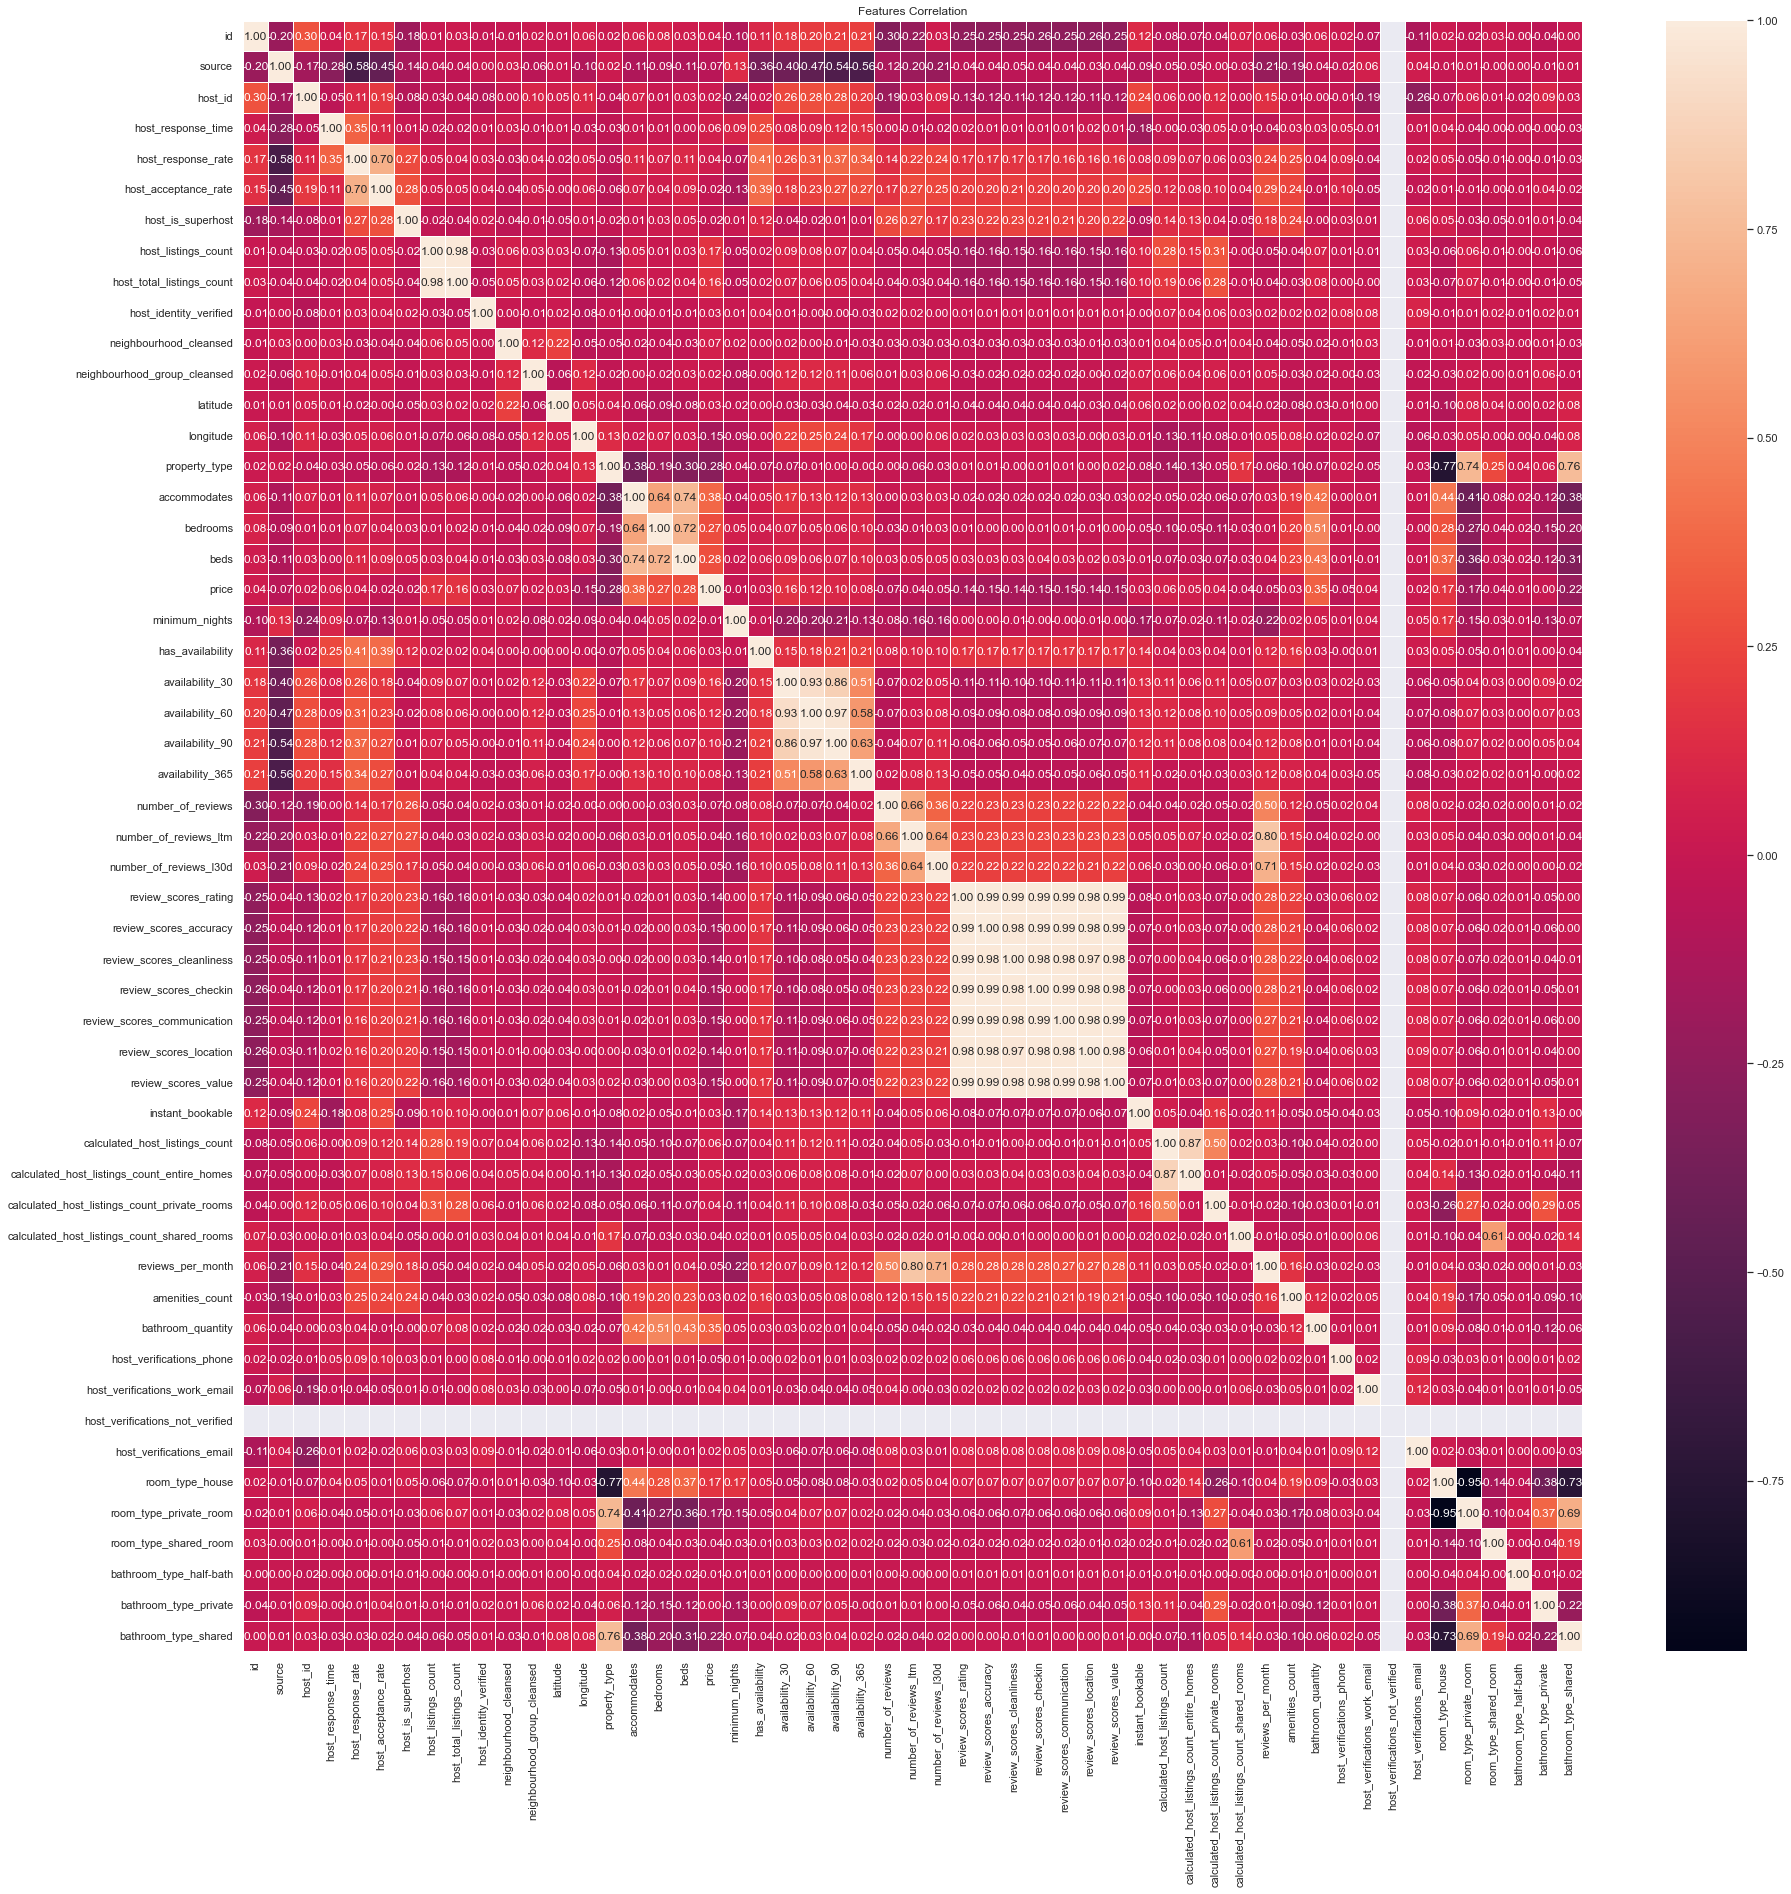

In [70]:
fig, ax = plt.subplots(figsize=(30,30)) 

corr = ny_listing_dataset.corr()

kot = corr[corr.apply(lambda x: abs(x)>=0)]

# Generate a mask for upper traingle
#mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(kot, annot = True, #mask=mask, 
                 linewidth=.5, fmt = '.2f')
plt.title('Features Correlation');
plt.xticks(rotation = 90);

**From the heatmap we can see that host_verifications_not_verified has correlation with other columns at all. It's safe to say that we can drop the column.**

In [71]:
ny_listing_dataset.drop(['host_verifications_not_verified'], axis=1, inplace=True)

### We have a lot of featurues with high correlation value, so I will drop some features with correlation value > 0.85

In [72]:
#finding correlation matrix
corr_matrix = ny_listing_dataset.corr().abs()
#getting high correlation attributes
high_corr_var=np.where(corr_matrix>0.85)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

print(high_corr_var)

[('host_listings_count', 'host_total_listings_count'), ('availability_30', 'availability_60'), ('availability_30', 'availability_90'), ('availability_60', 'availability_90'), ('review_scores_rating', 'review_scores_accuracy'), ('review_scores_rating', 'review_scores_cleanliness'), ('review_scores_rating', 'review_scores_checkin'), ('review_scores_rating', 'review_scores_communication'), ('review_scores_rating', 'review_scores_location'), ('review_scores_rating', 'review_scores_value'), ('review_scores_accuracy', 'review_scores_cleanliness'), ('review_scores_accuracy', 'review_scores_checkin'), ('review_scores_accuracy', 'review_scores_communication'), ('review_scores_accuracy', 'review_scores_location'), ('review_scores_accuracy', 'review_scores_value'), ('review_scores_cleanliness', 'review_scores_checkin'), ('review_scores_cleanliness', 'review_scores_communication'), ('review_scores_cleanliness', 'review_scores_location'), ('review_scores_cleanliness', 'review_scores_value'), ('revi

In [73]:
#creating a list of columns where high correlation value exists
drop_corr_var = []
for num in enumerate(high_corr_var):
   drop_corr_var.append(num[1][1])

drop_corr_var

['host_total_listings_count',
 'availability_60',
 'availability_90',
 'availability_90',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'review_scores_location',
 'review_scores_value',
 'review_scores_value',
 'calculated_host_listings_count_entire_homes',
 'room_type_private_room']

In [74]:
#removing duplicates
drop_corr_var = set(drop_corr_var)
print(drop_corr_var)

{'availability_90', 'review_scores_cleanliness', 'review_scores_location', 'calculated_host_listings_count_entire_homes', 'room_type_private_room', 'review_scores_value', 'availability_60', 'review_scores_checkin', 'host_total_listings_count', 'review_scores_communication', 'review_scores_accuracy'}


In [75]:
#removing columns that are not necessary as well as have high correlation
column_to_drop = ['calculated_host_listings_count_entire_homes','host_total_listings_count', 'availability_60', 
                  'availability_90','calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_entire_homes',
                 'id','latitude','longitude','availability_30', 'availability_365', 'review_scores_location',
                 'calculated_host_listings_count_shared_rooms', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 
                 'calculated_host_listings_count']

ny_listing_dataset.drop(columns=column_to_drop, axis=1, inplace=True)

## We will use Mutual Information method to select features which is best for our data.  This will compute the interconnectivity of the features and give us the opportunity to chose values which can represent the underlying feature decision set without using values that are overly internally related.

In [76]:
ny_listing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19613 entries, 6 to 39880
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   source                         19613 non-null  int64  
 1   host_id                        19613 non-null  int64  
 2   host_response_time             19613 non-null  float64
 3   host_response_rate             19613 non-null  float64
 4   host_acceptance_rate           19613 non-null  float64
 5   host_is_superhost              19613 non-null  int64  
 6   host_listings_count            19613 non-null  float64
 7   host_identity_verified         19613 non-null  int64  
 8   neighbourhood_cleansed         19613 non-null  int64  
 9   neighbourhood_group_cleansed   19613 non-null  int64  
 10  property_type                  19613 non-null  int64  
 11  accommodates                   19613 non-null  int64  
 12  bedrooms                       19613 non-null 

In [77]:
X = ny_listing_dataset.drop(['price'], axis=1)
Y = ny_listing_dataset[['price']]

X = X.drop(['host_id'], axis=1)

In [78]:
#calculating Mutual Information Score
def Mututal_Information_Score(x, y):
    
    scores = []
    for col in x.columns:
        r = np.corrcoef(X["minimum_nights"].values, y.values.flatten())[0,1]
        bins = int(np.round((1/np.sqrt(2))*pow(1+np.sqrt( 1+ (24*X.shape[0])/(1-r*r)), 0.5)))
        c_xy = np.histogram2d(x[col].values, y.values.flatten(), bins=bins)[0]
        mi = mutual_info_score(None, None, contingency=c_xy)
        scores.append(mi)
        
    mi_scores = pd.Series(scores, name="MI Scores", index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return  mi_scores

mi_scores = Mututal_Information_Score(X, Y)
print("-----------------------------------------")
print("Mutual information scores:")
# show a few features with their MI scores
print( mi_scores)

-----------------------------------------
Mutual information scores:
bathroom_quantity                0.029949
accommodates                     0.029004
bedrooms                         0.019951
beds                             0.016857
property_type                    0.008935
neighbourhood_group_cleansed     0.008888
review_scores_rating             0.008558
review_scores_cleanliness        0.008352
review_scores_checkin            0.008276
review_scores_communication      0.008144
review_scores_accuracy           0.008115
review_scores_value              0.007858
neighbourhood_cleansed           0.007353
host_acceptance_rate             0.005875
bathroom_type_shared             0.005153
host_listings_count              0.005008
amenities_count                  0.004712
host_response_rate               0.004212
minimum_nights                   0.002159
room_type_house                  0.002006
room_type_private_room           0.001985
number_of_reviews                0.001847
host_re

### From the Mutual Information Table, we can see the attributes which have most interconnectivity with our desired column, But among these we will take top 15 attributes.

## Selected Attributes
**bathroom_quantity, accommodates, bedrooms, beds, property_type, neighbourhood_group_cleansed, review_scores_rating,
review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_accuracy,  review_scores_value, host_acceptance_rate, bathroom_type_shared**


## For replacing outliers we will check mutual information for minimum_nights and replacing NaN we will check mutual information for review_score_accuracy

In [79]:
#calculating Mutual Information Score
def Mututal_Information_Score_outliers(x, y):
    
    scores = []
    for col in x.columns:
        r = np.corrcoef(X_min["price"].values, y.values.flatten())[0,1]
        bins = int(np.round((1/np.sqrt(2))*pow(1+np.sqrt( 1+ (24*X.shape[0])/(1-r*r)), 0.5)))
        c_xy = np.histogram2d(x[col].values, y.values.flatten(), bins=bins)[0]
        mi = mutual_info_score(None, None, contingency=c_xy)
        scores.append(mi)
        
    mi_scores = pd.Series(scores, name="MI Scores", index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return  mi_scores

In [80]:
X_min = ny_listing_dataset.drop(['minimum_nights'], axis=1)
Y_min = ny_listing_dataset[['minimum_nights']]

X_min = X_min.drop(['host_id'], axis=1)

mi_scores = Mututal_Information_Score_outliers(X_min, Y_min)
print("-----------------------------------------")
print("Mutual information scores for Minimum Nights:")
print( mi_scores)  # show a few features with their MI scores

-----------------------------------------
Mutual information scores for Minimum Nights:
property_type                    0.068807
room_type_house                  0.034630
room_type_private_room           0.026992
host_acceptance_rate             0.026418
instant_bookable                 0.025002
host_response_time               0.023189
review_scores_communication      0.022493
review_scores_accuracy           0.022426
host_listings_count              0.022393
review_scores_rating             0.022353
neighbourhood_cleansed           0.022350
review_scores_checkin            0.019716
accommodates                     0.019486
review_scores_value              0.019255
amenities_count                  0.017604
neighbourhood_group_cleansed     0.016331
bathroom_type_private            0.016291
review_scores_cleanliness        0.015429
host_response_rate               0.015175
reviews_per_month                0.013701
bedrooms                         0.013281
beds                          

#### From the Mutual Information Score we can see that, for replacing the outliers in the minimum_nights column which other columns information are the most important. From these we will take top 15 features and they are:

**property_type, room_type_house, room_type_private_room, host_acceptance_rate, instant_bookable, host_response_time, review_scores_communication, review_scores_accuracy, host_listings_count, review_scores_rating, neighbourhood_group_cleansed, review_scores_checkin, accommodates, review_scores_value, amenities_count**

In [81]:
X_rev = ny_listing_dataset.drop(['review_scores_accuracy'], axis=1)
Y_rev = ny_listing_dataset[['review_scores_accuracy']]

X_rev = X_rev.drop(['host_id'], axis=1)

mi_scores = Mututal_Information_Score_outliers(X_rev, Y_rev)
print("-----------------------------------------")
print("Mutual information scores for Review Score Accuracy:")
print( mi_scores)  # show a few features with their MI scores

-----------------------------------------
Mutual information scores for Review Score Accuracy:
review_scores_rating             0.705633
review_scores_value              0.663245
review_scores_cleanliness        0.588500
review_scores_communication      0.566572
review_scores_checkin            0.548724
host_is_superhost                0.063785
amenities_count                  0.045946
number_of_reviews                0.035208
host_acceptance_rate             0.029715
host_response_rate               0.026539
property_type                    0.023547
minimum_nights                   0.022426
host_response_time               0.018845
neighbourhood_cleansed           0.016486
instant_bookable                 0.015009
host_listings_count              0.011547
has_availability                 0.010745
neighbourhood_group_cleansed     0.009893
room_type_house                  0.009243
accommodates                     0.008810
price                            0.008115
beds                   

#### From the Mutual Information Score we can see that, for replacing the NaN in the review_scores_accuracy column which other columns information are the most important. From these we will take top 15 features and they are:

**review_scores_rating, review_scores_value, review_scores_cleanliness, review_scores_communication, review_scores_checkin, host_is_superhost, amenities_count, number_of_reviews, host_acceptance_rate, host_response_rate, property_type, minimum_nights, host_response_time, neighbourhood_group_cleansed,
instant_bookable**


### From the mutual information we can see which attributes are important for our analysis.

**Most Common Features:  
property_type, review_scores_rating, review_scores_checkin,review_scores_communication, review_scores_value, neighbourhood_group_cleansed, host_acceptance_rate**

**Present in 2 Mutual Information:
accommodates, review_scores_cleanliness, review_scores_accuracy,instant_bookable, host_response_time**

**Unique in Mutual Information:
bathroom_quantity, bedrooms, beds, bathroom_type_shared, room_type_house, room_type_private_room, host_listings_count, amenities_count, host_is_superhost, number_of_reviews, host_response_rate, minimum_nights**

### These will be features for our models 


In [82]:
#creating a list for features
features = ['property_type', 'review_scores_rating', 'review_scores_checkin','review_scores_communication', 
            'review_scores_value', 'neighbourhood_group_cleansed', 'host_acceptance_rate', 'accommodates', 
            'review_scores_cleanliness', 'review_scores_accuracy','instant_bookable', 'host_response_time', 
            'bathroom_quantity', 'bedrooms', 'beds', 'bathroom_type_shared', 'room_type_house', 'room_type_private_room', 
            'host_listings_count', 'amenities_count', 'host_is_superhost', 'number_of_reviews', 'host_response_rate', 
            'minimum_nights','price']



In [83]:
#getting the list for dataset columns
all_column_names = ny_listing_dataset.columns.to_list()
#getting columns names which will be dropped
dropping_column_names = list(set(all_column_names) - set(features))

print(dropping_column_names)
#dropping rest of the columns
ny_listing_dataset.drop(columns=dropping_column_names, axis=1, inplace=True)

ny_listing_dataset.info()

['host_identity_verified', 'bathroom_type_half-bath', 'neighbourhood_cleansed', 'has_availability', 'room_type_shared_room', 'host_id', 'reviews_per_month', 'source', 'host_verifications_phone', 'host_verifications_email', 'bathroom_type_private', 'host_verifications_work_email']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19613 entries, 6 to 39880
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            19613 non-null  float64
 1   host_response_rate            19613 non-null  float64
 2   host_acceptance_rate          19613 non-null  float64
 3   host_is_superhost             19613 non-null  int64  
 4   host_listings_count           19613 non-null  float64
 5   neighbourhood_group_cleansed  19613 non-null  int64  
 6   property_type                 19613 non-null  int64  
 7   accommodates                  19613 non-null  int64  
 8   bedrooms       

**We will run our model based on this features. But to remove outliers and replace NaN values, we need to bring all datasets in the same order and scaled them with the same scaling.**

In [84]:
columns_to_remove = ['id','host_id', 'source', 'host_since', 'latitude', 'longitude', 'host_total_listings_count', 'availability_30',
                      'availability_60', 'availability_90', 'availability_365', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
                      'review_scores_location', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                      'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_verifications',
                      'host_identity_verified', 'first_review', 'last_review', 'neighbourhood_cleansed']

test_df_min_nights.drop(columns=columns_to_remove, axis=1, inplace=True)

test_df_review_score_accuracy.drop(columns=columns_to_remove, axis=1, inplace=True)



In [85]:
test_df_min_nights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1266 to 15597
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            900 non-null    object 
 1   host_response_rate            900 non-null    float64
 2   host_acceptance_rate          981 non-null    float64
 3   host_is_superhost             1998 non-null   object 
 4   host_listings_count           1997 non-null   float64
 5   neighbourhood_group_cleansed  2000 non-null   object 
 6   property_type                 2000 non-null   object 
 7   room_type                     2000 non-null   object 
 8   accommodates                  2000 non-null   int64  
 9   bathrooms_text                1995 non-null   object 
 10  bedrooms                      1775 non-null   float64
 11  beds                          1954 non-null   float64
 12  amenities                     2000 non-null   object 
 13 

In [86]:
test_df_min_nights['host_response_time'] = test_df_min_nights['host_response_time'].fillna('Not Mentioned')
test_df_review_score_accuracy['host_response_time'] = test_df_review_score_accuracy['host_response_time'].fillna('Not Mentioned')

In [87]:
boolean_columns = ['host_is_superhost','has_availability','instant_bookable']

for boolean_col in boolean_columns:
    test_df_min_nights[boolean_col].replace({'t|T': 1, 'f|F': 0}, regex=True, inplace=True)
    test_df_review_score_accuracy[boolean_col].replace({'t|T': 1, 'f|F': 0}, regex=True, inplace=True)

In [88]:
#Removing Brackets and Special Characters from ammenities column
test_df_min_nights.amenities.replace(r'[\[\]\"\'\.]', '', regex=True, inplace=True)
test_df_min_nights.amenities.replace(to_replace=r"\\u", value=" ", regex=True, inplace=True)
test_df_min_nights.amenities.replace(to_replace=r"\\", value=" ", regex=True, inplace=True)
test_df_min_nights.amenities.str.lower()

test_df_min_nights['amenities_count'] = test_df_min_nights['amenities'].str.split(',').str.len()



#Removing Brackets and Special Characters from ammenities column
test_df_review_score_accuracy.amenities.replace(r'[\[\]\"\'\.]', '', regex=True, inplace=True)
test_df_review_score_accuracy.amenities.replace(to_replace=r"\\u", value=" ", regex=True, inplace=True)
test_df_review_score_accuracy.amenities.replace(to_replace=r"\\", value=" ", regex=True, inplace=True)
test_df_review_score_accuracy.amenities.str.lower()

test_df_review_score_accuracy['amenities_count'] = test_df_review_score_accuracy['amenities'].str.split(',').str.len()


In [89]:
#replacing categories of houses/hotels/apartments
test_df_min_nights = test_df_min_nights.replace({
                            'Private room in rental unit' : 'private_room',
                            'Entire rental unit' : 'house',
                            'Entire townhouse' : 'house',
                            'Room in boutique hotel' : 'hotel',
                            'Private room in bed and breakfast' : 'private_room', 
                            'Private room in townhouse' : 'private_room',
                            'Private room in home' : 'private_room', 
                            'Private room in condo' : 'private_room',
                            'Private room in loft' : 'private_room', 
                            'Entire guesthouse' : 'house', 
                            'Entire guest suite' : 'house',
                            'Entire loft' : 'house', 
                            'Private room in guest suite' : 'private_room',
                            'Entire serviced apartment' : 'apartment', 
                            'Entire condo' : 'house', 
                            'Entire home' : 'house',
                            'Shared room in loft' : 'shared_room', 
                            'Shared room in rental unit' : 'shared_room',
                            'Private room in houseboat' :  'private_room', 
                            'Shared room in home' : 'shared_room', 
                            'Private room' : 'private_room',
                            'Entire place' : 'house', 
                            'Private room in guesthouse' : 'private_room', 
                            'Boat' : 'other',
                            'Room in aparthotel' : 'apartment', 
                            'Room in serviced apartment' : 'apartment',
                            'Private room in religious building' : 'private_room', 
                            'Entire cottage' : 'house',
                            'Private room in serviced apartment' : 'private_room', 
                            'Cave' : 'other', 
                            'Tiny home' : 'house',
                            'Entire bungalow' : 'house', 
                            'Shared room in condo' : 'shared_room', 
                            'Floor' : 'private_room',
                            'Private room in hostel' : 'private_room', 
                            'Private room in casa particular' : 'private_room',
                            'Room in hotel' : 'hotel', 
                            'Shared room in townhouse' : 'shared_room',
                            'Private room in bungalow' : 'private_room', 
                            'Houseboat' : 'other', 
                            'Private room in resort' : 'private_room',
                            'Entire villa' : 'house', 
                            'Shared room in guest suite' : 'shared_room',
                            'Private room in villa' : 'private_room', 
                            'Shared room in floor' : 'shared_room',
                            'Private room in floor' : 'private_room', 
                            'Entire bed and breakfast' : 'house',
                            'Entire home/apt' : 'house', 
                            'Private room in tent' : 'private_room',
                            'Private room in in-law' : 'private_room', 
                            'Shared room in hostel' : 'shared_room',
                            'Room in resort' : 'private_room', 
                            'Shared room in guesthouse' : 'shared_room',
                            'Shared room in bed and breakfast' : 'shared_room', 
                            'Private room in farm stay' : 'private_room',
                            'Private room in dorm' : 'private_room', 
                            'Room in bed and breakfast' : 'private_room',
                            'Private room in tiny home' : 'private_room', 
                            'Shared room in serviced apartment' : 'shared_room',
                            'Shared room in bungalow' : 'shared_room', 
                            'Private room in earthen home' : 'private_room',
                            'Private room in barn' : 'private_room', 
                            'Private room in cottage' : 'private_room', 
                            'Lighthouse' : 'house',
                            'Private room in train' : 'private_room', 
                            'Barn' : 'house', 
                            'Private room in lighthouse' : 'private_room',
                            'Casa particular' : 'house', 
                            'Camper/RV' : 'other', 
                            'Private room in camper/rv' : 'private_room',
                            'Private room in vacation home' : 'private_room', 
                            'Castle' : 'other', 
                            'Tent' : 'other', 
                            'Tower' : 'other',
                            'Entire vacation home' : 'house', 
                            'Shared room in vacation home' : 'shared_room',
                            'Private room in minsu' : 'private_room', 
                            'Shared room' : 'shared_room',
                            'Shared room in casa particular' : 'shared_room'  
                        })


#replacing categories of houses/hotels/apartments
test_df_review_score_accuracy = test_df_review_score_accuracy.replace({
                            'Private room in rental unit' : 'private_room',
                            'Entire rental unit' : 'house',
                            'Entire townhouse' : 'house',
                            'Room in boutique hotel' : 'hotel',
                            'Private room in bed and breakfast' : 'private_room', 
                            'Private room in townhouse' : 'private_room',
                            'Private room in home' : 'private_room', 
                            'Private room in condo' : 'private_room',
                            'Private room in loft' : 'private_room', 
                            'Entire guesthouse' : 'house', 
                            'Entire guest suite' : 'house',
                            'Entire loft' : 'house', 
                            'Private room in guest suite' : 'private_room',
                            'Entire serviced apartment' : 'apartment', 
                            'Entire condo' : 'house', 
                            'Entire home' : 'house',
                            'Shared room in loft' : 'shared_room', 
                            'Shared room in rental unit' : 'shared_room',
                            'Private room in houseboat' :  'private_room', 
                            'Shared room in home' : 'shared_room', 
                            'Private room' : 'private_room',
                            'Entire place' : 'house', 
                            'Private room in guesthouse' : 'private_room', 
                            'Boat' : 'other',
                            'Room in aparthotel' : 'apartment', 
                            'Room in serviced apartment' : 'apartment',
                            'Private room in religious building' : 'private_room', 
                            'Entire cottage' : 'house',
                            'Private room in serviced apartment' : 'private_room', 
                            'Cave' : 'other', 
                            'Tiny home' : 'house',
                            'Entire bungalow' : 'house', 
                            'Shared room in condo' : 'shared_room', 
                            'Floor' : 'private_room',
                            'Private room in hostel' : 'private_room', 
                            'Private room in casa particular' : 'private_room',
                            'Room in hotel' : 'hotel', 
                            'Shared room in townhouse' : 'shared_room',
                            'Private room in bungalow' : 'private_room', 
                            'Houseboat' : 'other', 
                            'Private room in resort' : 'private_room',
                            'Entire villa' : 'house', 
                            'Shared room in guest suite' : 'shared_room',
                            'Private room in villa' : 'private_room', 
                            'Shared room in floor' : 'shared_room',
                            'Private room in floor' : 'private_room', 
                            'Entire bed and breakfast' : 'house',
                            'Entire home/apt' : 'house', 
                            'Private room in tent' : 'private_room',
                            'Private room in in-law' : 'private_room', 
                            'Shared room in hostel' : 'shared_room',
                            'Room in resort' : 'private_room', 
                            'Shared room in guesthouse' : 'shared_room',
                            'Shared room in bed and breakfast' : 'shared_room', 
                            'Private room in farm stay' : 'private_room',
                            'Private room in dorm' : 'private_room', 
                            'Room in bed and breakfast' : 'private_room',
                            'Private room in tiny home' : 'private_room', 
                            'Shared room in serviced apartment' : 'shared_room',
                            'Shared room in bungalow' : 'shared_room', 
                            'Private room in earthen home' : 'private_room',
                            'Private room in barn' : 'private_room', 
                            'Private room in cottage' : 'private_room', 
                            'Lighthouse' : 'house',
                            'Private room in train' : 'private_room', 
                            'Barn' : 'house', 
                            'Private room in lighthouse' : 'private_room',
                            'Casa particular' : 'house', 
                            'Camper/RV' : 'other', 
                            'Private room in camper/rv' : 'private_room',
                            'Private room in vacation home' : 'private_room', 
                            'Castle' : 'other', 
                            'Tent' : 'other', 
                            'Tower' : 'other',
                            'Entire vacation home' : 'house', 
                            'Shared room in vacation home' : 'shared_room',
                            'Private room in minsu' : 'private_room', 
                            'Shared room' : 'shared_room',
                            'Shared room in casa particular' : 'shared_room'  
                        })

In [90]:
test_df_min_nights = test_df_min_nights.replace({
    'Hotel room' : 'hotel_room'
})


test_df_review_score_accuracy = test_df_review_score_accuracy.replace({
    'Hotel room' : 'hotel_room'
})


In [91]:
test_df_min_nights['bathroom_quantity'] = test_df_min_nights['bathrooms_text'].str.split(' ', expand=True)[0]
test_df_min_nights['bathroom_type'] = test_df_min_nights['bathrooms_text'].str.split(' ', expand=True)[1]

test_df_review_score_accuracy['bathroom_quantity'] = test_df_review_score_accuracy['bathrooms_text'].str.split(' ', expand=True)[0]
test_df_review_score_accuracy['bathroom_type'] = test_df_review_score_accuracy['bathrooms_text'].str.split(' ', expand=True)[1]


In [92]:
test_df_review_score_accuracy.bathroom_quantity.unique()

array(['1.5', '1', '2', '2.5', '3', '3.5', '4.5', nan, '0', '6', '4',
       '5.5', 'Half-bath', 'Private'], dtype=object)

In [93]:
test_df_min_nights.bathroom_quantity.replace({
    'Shared' : '1',
    'Half-bath' : '0.5',
    'Private' : '1',
    'bath' : '1'
}, inplace=True)

test_df_review_score_accuracy.bathroom_quantity.replace({
    'Shared' : '1',
    'Half-bath' : '0.5',
    'Private' : '1',
    'bath' : '1'
}, inplace=True)

In [94]:
test_df_min_nights['bathroom_quantity'] = test_df_min_nights['bathroom_quantity'].astype(float)
test_df_review_score_accuracy['bathroom_quantity'] = test_df_review_score_accuracy['bathroom_quantity'].astype(float)

In [95]:
test_df_min_nights.replace(to_replace=[None], value='bath', inplace=True)
test_df_review_score_accuracy.replace(to_replace=[None], value='bath', inplace=True)

In [96]:
test_df_min_nights.bathroom_type.replace({
    'baths' : 'bath'
}, inplace=True)


test_df_review_score_accuracy.bathroom_type.replace({
    'baths' : 'bath'
}, inplace=True)


In [97]:
test_df_min_nights.drop(['bathrooms_text','amenities'], axis=1, inplace=True)
test_df_review_score_accuracy.drop(['bathrooms_text','amenities'], axis=1, inplace=True)

In [98]:
test_df_min_nights.host_response_time.unique()

array(['Not Mentioned', 'within an hour', 'within a day',
       'within a few hours', 'a few days or more'], dtype=object)

In [99]:
test_df_min_nights['neighbourhood_group_cleansed'] = le.fit_transform(test_df_min_nights['neighbourhood_group_cleansed'])
test_df_min_nights['property_type'] = le.fit_transform(test_df_min_nights['property_type'])

# ordinal encoding methods
test_df_min_nights = test_df_min_nights.replace({
    'Not Mentioned': 0.0, 
    'within an hour': 1.0,
    'within a few hours': 2.0,
    'within a day': 3.0,
    'a few days or more': 4.0
})



test_df_review_score_accuracy['neighbourhood_group_cleansed'] = le.fit_transform(test_df_review_score_accuracy['neighbourhood_group_cleansed'])
test_df_review_score_accuracy['property_type'] = le.fit_transform(test_df_review_score_accuracy['property_type'])

# ordinal encoding methods
test_df_review_score_accuracy = test_df_review_score_accuracy.replace({
    'Not Mentioned': 0.0, 
    'within an hour': 1.0,
    'within a few hours': 2.0,
    'within a day': 3.0,
    'a few days or more': 4.0
})

In [100]:
cat_cols = ['room_type','bathroom_type']

#converting categorical values to str
test_df_min_nights[cat_cols] = test_df_min_nights[cat_cols].astype('str')
test_df_review_score_accuracy[cat_cols] = test_df_review_score_accuracy[cat_cols].astype('str')



#encoding training dataset with get_dummies
test_df_min_nights = pd.get_dummies(test_df_min_nights, drop_first=True)
test_df_review_score_accuracy = pd.get_dummies(test_df_review_score_accuracy, drop_first=True)


In [101]:
#filling the columns with 0 for test_df_min_nights
test_df_min_nights.update(test_df_min_nights.select_dtypes(include=[int, np.float32, np.float64]).fillna(0))


#filling the columns with 0 except for review_scores_accuracy in test_df_review_score_accuracy
all_columns = test_df_review_score_accuracy.select_dtypes(include=[int, np.float32, np.float64]).columns.to_list()
nan_column = ['review_scores_accuracy']
all_columns_without_nan = list(set(all_columns) - set(nan_column))
test_df_review_score_accuracy[all_columns_without_nan] = test_df_review_score_accuracy[all_columns_without_nan].fillna(0)

In [102]:
test_df_min_nights.head()

host_response_time  host_response_rate  host_acceptance_rate  \
1266                  0.0                 0.0                   0.0   
21265                 0.0                 0.0                   0.0   
14873                 0.0                 0.0                   0.0   
2596                  0.0                 0.0                   0.0   
22701                 0.0                 0.0                   0.0   

       host_is_superhost  host_listings_count  neighbourhood_group_cleansed  \
1266                 0.0                  1.0                             1   
21265                0.0                  1.0                             2   
14873                0.0                  1.0                             1   
2596                 0.0                  1.0                             1   
22701                0.0                  1.0                             1   

       property_type  accommodates  bedrooms  beds  ...  review_scores_value  \
1266               3             1       1.0   1.0  ...                  5.0   
21265              3             2       1.0   1.0  ...                  0.0   
14873              2             2       0.0   1.0  ...                  0.0   
2596               3             2       1.0   2.0  ...                  4.7   
22701              2             5       2.0   3.0  ...                  4.0   

       instant_bookable  reviews_per_month  amenities_count  \
1266                  0               0.03                8   
21265                 0               0.00               16   
14873                 0               0.00                9   
2596                  0               0.32               20   
22701                 1               0.04               41   

       bathroom_quantity  room_type_house  room_type_private_room  \
1266                 1.0                0                       1   
21265                1.0                0                       1   
14873                1.0                1                       0   
2596                 1.0                0                       1   
22701                1.5                1                       0   

       room_type_shared_room  bathroom_type_private  bathroom_type_shared  
1266                       0                      0                     0  
21265                      0                      0                     1  
14873                      0                      0                     0  
2596                       0                      0                     1  
22701                      0                      0                     0  

[5 rows x 29 columns]

In [103]:
test_df_review_score_accuracy.head()

host_response_time  host_response_rate  host_acceptance_rate  \
32377                 0.0                0.00                  0.00   
12028                 2.0                0.94                  0.79   
33678                 1.0                1.00                  0.57   
21994                 0.0                0.00                  0.00   
35487                 1.0                0.78                  0.89   

       host_is_superhost  host_listings_count  neighbourhood_group_cleansed  \
32377                0.0                  1.0                             0   
12028                0.0                 83.0                             2   
33678                0.0                  3.0                             2   
21994                0.0                  1.0                             2   
35487                0.0                  6.0                             2   

       property_type  accommodates  bedrooms  beds  ...  instant_bookable  \
32377              4             2       2.0   2.0  ...                 0   
12028              0             4       1.0   1.0  ...                 1   
33678              2             2       1.0   1.0  ...                 1   
21994              4             2       2.0   2.0  ...                 0   
35487              1             4       1.0   2.0  ...                 1   

       reviews_per_month  amenities_count  bathroom_quantity  room_type_house  \
32377                0.0               14                1.5                0   
12028                0.0               23                1.0                0   
33678                0.0               33                1.0                1   
21994                0.0               16                2.0                0   
35487                0.0               20                1.0                0   

       room_type_private_room  room_type_shared_room  bathroom_type_half-bath  \
32377                       1                      0                        0   
12028                       0                      0                        0   
33678                       0                      0                        0   
21994                       1                      0                        0   
35487                       1                      0                        0   

       bathroom_type_private  bathroom_type_shared  
32377                      0                     1  
12028                      0                     0  
33678                      0                     0  
21994                      0                     0  
35487                      0                     0  

[5 rows x 30 columns]

In [104]:
x = test_df_min_nights.columns.to_list()
y = test_df_review_score_accuracy.columns.to_list()

z = list(set(x) - set(y))
print(z)

[]


In [105]:
train_dataset_columns = ny_listing_dataset.columns.to_list()
test_dataset_columns_min_nights = test_df_min_nights.columns.to_list()
test_dataset_columns_score = test_df_review_score_accuracy.columns.to_list()


removing_column_names_for_min_nights = list(set(test_dataset_columns_min_nights) - set(train_dataset_columns))
removing_column_names_for_score = list(set(test_dataset_columns_score) - set(train_dataset_columns))



In [106]:
test_df_min_nights.drop(columns=removing_column_names_for_min_nights, axis=1, inplace=True)
test_df_review_score_accuracy.drop(columns=removing_column_names_for_score, axis=1, inplace=True)

In [107]:
listings = ny_listing_dataset.columns.to_list()

min_nights = test_df_min_nights.columns.to_list()

rev_score = test_df_review_score_accuracy.columns.to_list()



print(list(set(listings) - set(min_nights)))
print(list(set(listings) - set(rev_score)))


print(list(set(min_nights) - set(listings)))
print(list(set(min_nights) - set(rev_score)))


print(list(set(rev_score) - set(listings)))
print(list(set(rev_score) - set(min_nights)))

print(len(listings))
print(len(min_nights))
print(len(rev_score))


[]
[]
[]
[]
[]
[]
25
25
25


**Out Test and Train dataset are all in the same shape**

## Scaling

In [108]:
def plot_histograms_density(df, columns, df_transformed, fig_title):
    fig, axs = plt.subplots(len(columns),2,figsize=(15,65), constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        ny_listing_dataset[c].hist(ax=axs[i], density=True) # normalizes the density
        ny_listing_dataset[c].plot.density(ax=axs[i], title=c)
        df_transformed[c].hist(ax=axs[i+1], density=True, stacked=True) # normalizes the density
        df_transformed[c].plot.density(ax=axs[i+1], title=str(c+'_transformed'))
        i+=2

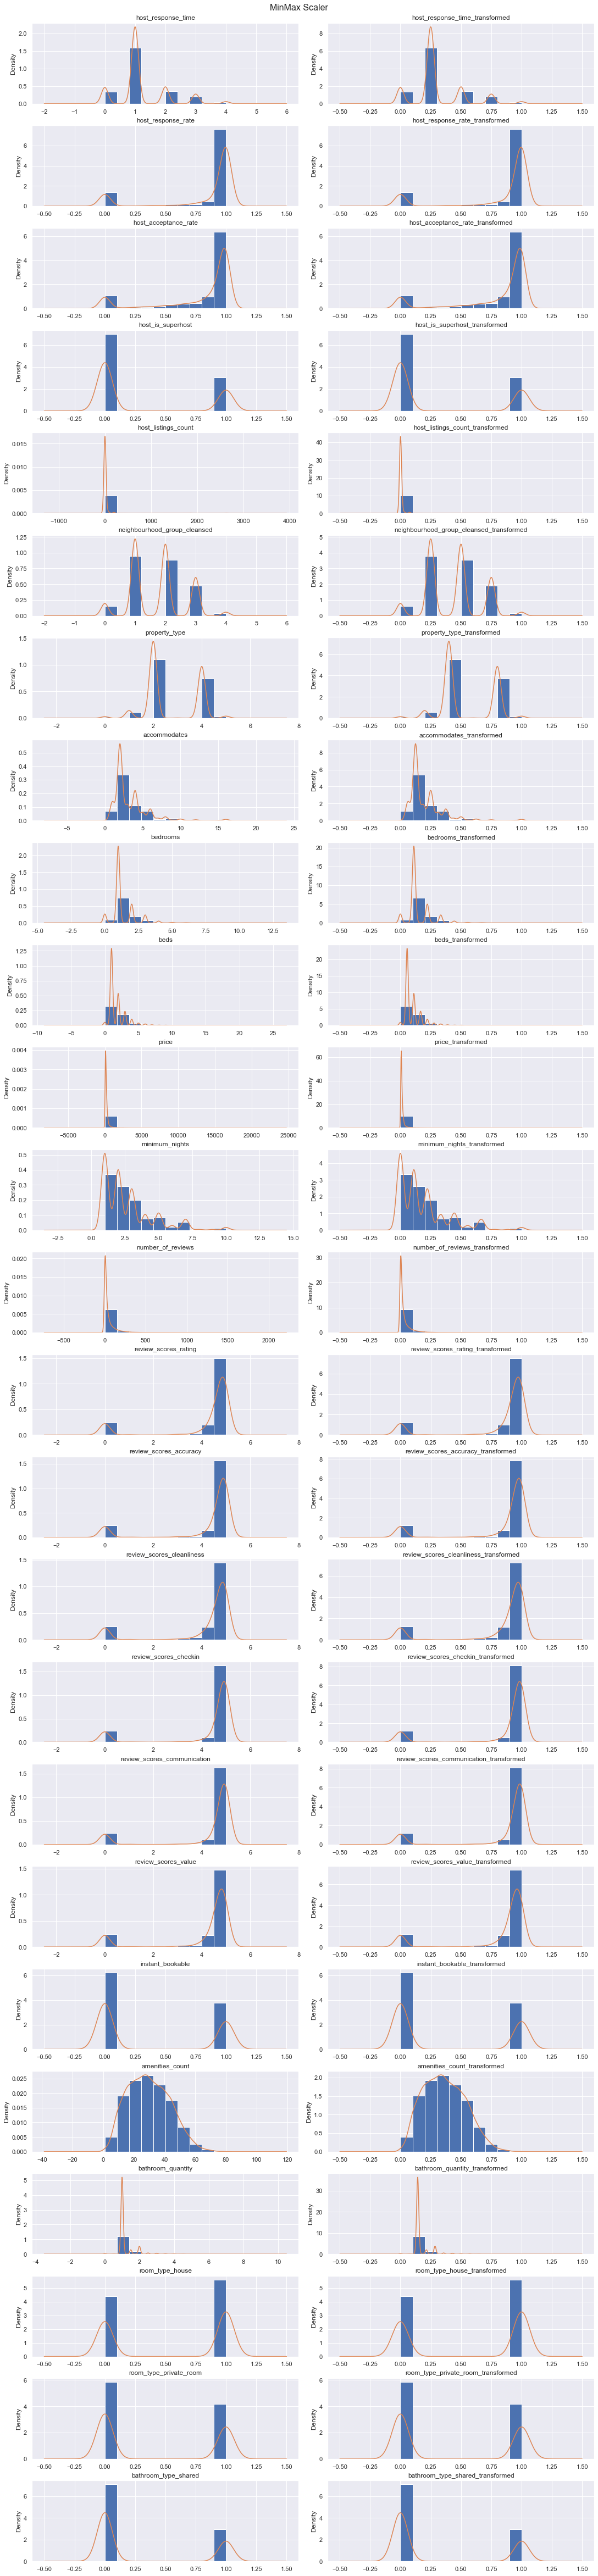

In [109]:
# transform the data
scaler = MinMaxScaler()
min_max_tdf = scaler.fit_transform(ny_listing_dataset)
min_max_tdf = pd.DataFrame(min_max_tdf, index=ny_listing_dataset.index, columns=ny_listing_dataset.columns)

plot_histograms_density(ny_listing_dataset, train_dataset_columns, min_max_tdf, 'MinMax Scaler');

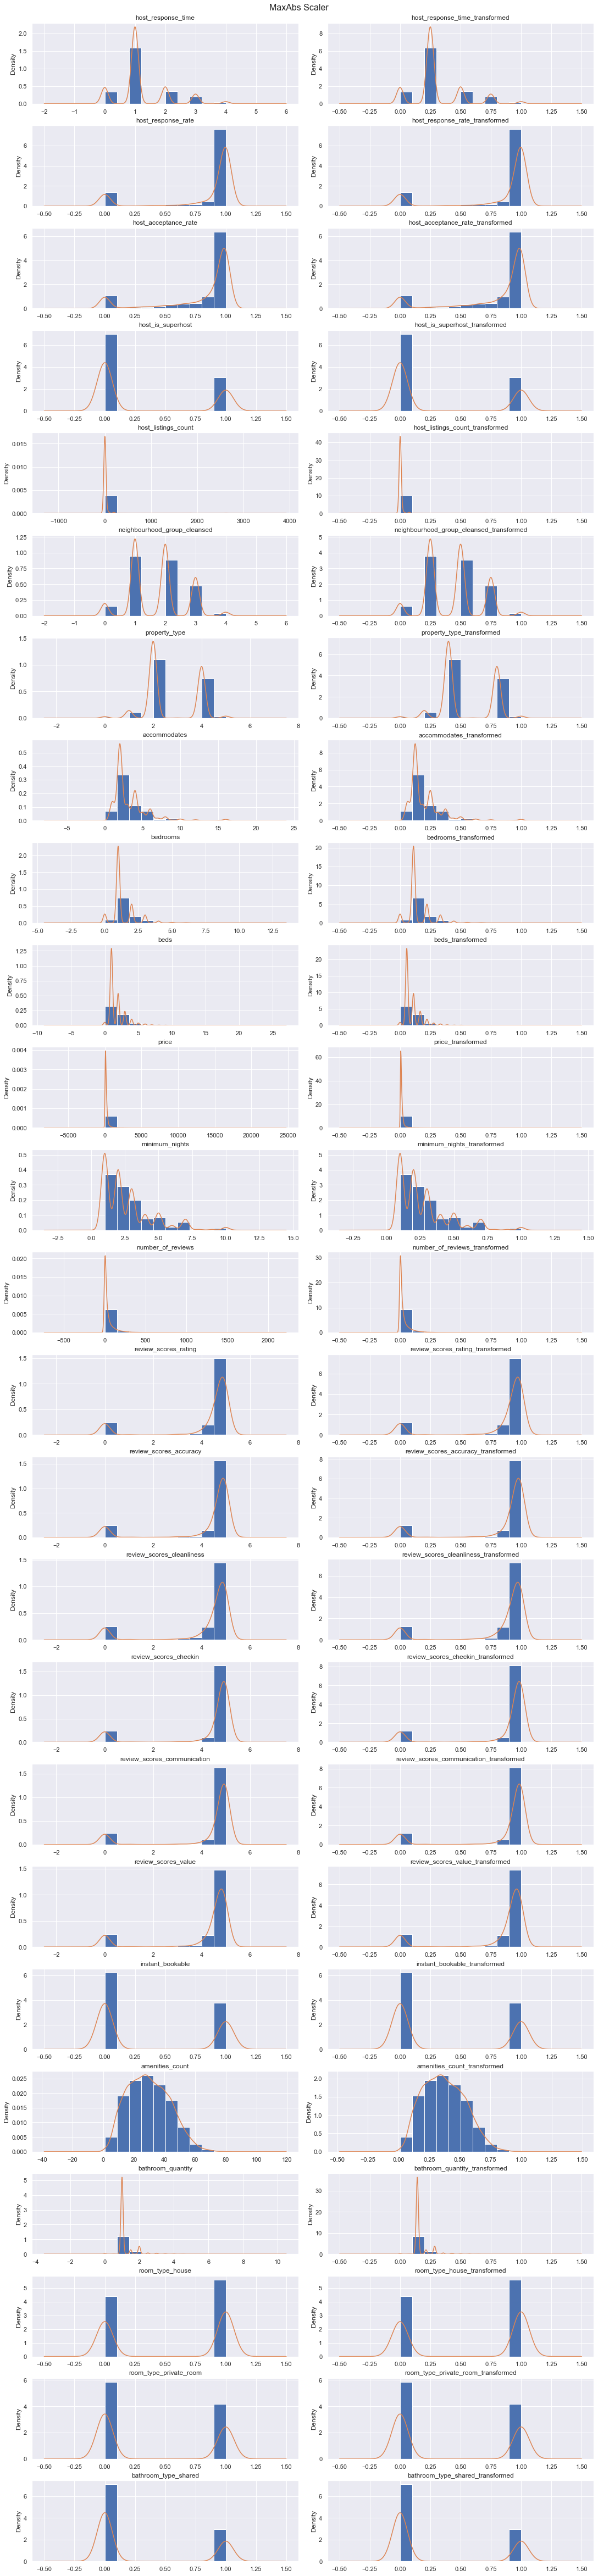

In [110]:
# transform the data
scaler = MaxAbsScaler()
maxabs_tdf = scaler.fit_transform(ny_listing_dataset)
maxabs_tdf = pd.DataFrame(maxabs_tdf, index=ny_listing_dataset.index, columns=ny_listing_dataset.columns)

plot_histograms_density(ny_listing_dataset, train_dataset_columns, maxabs_tdf, 'MaxAbs Scaler')

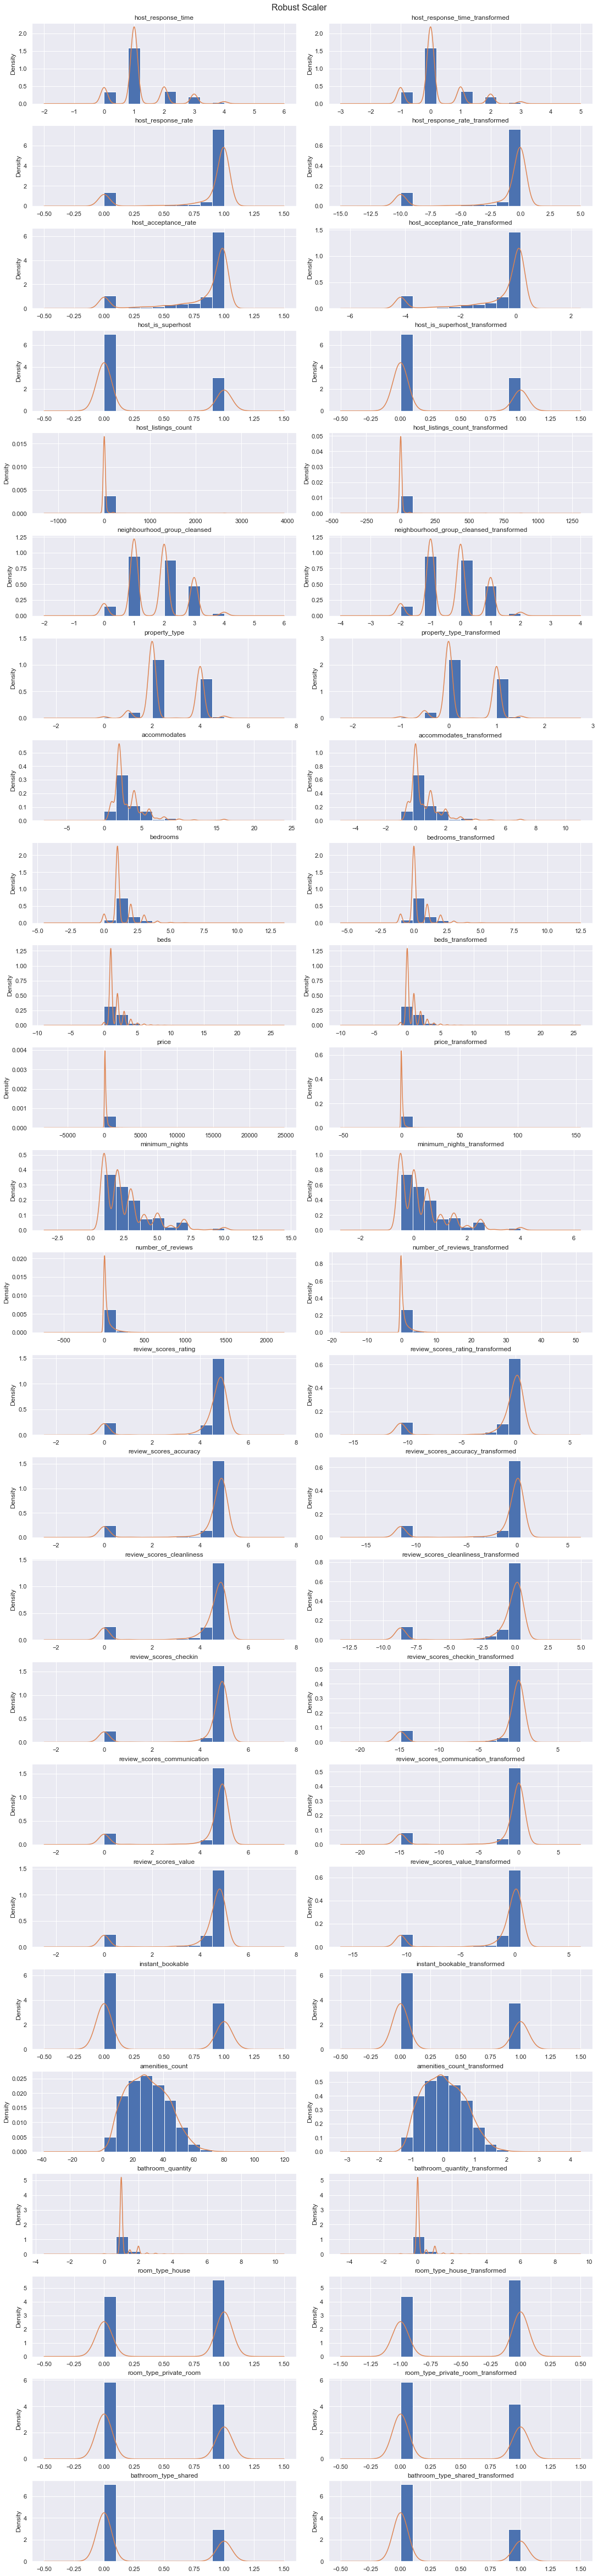

In [111]:
# transform the data
scaler = RobustScaler()
robust_tdf = scaler.fit_transform(ny_listing_dataset)
robust_tdf = pd.DataFrame(robust_tdf, index=ny_listing_dataset.index, columns=ny_listing_dataset.columns)

plot_histograms_density(ny_listing_dataset, train_dataset_columns, robust_tdf, 'Robust Scaler')

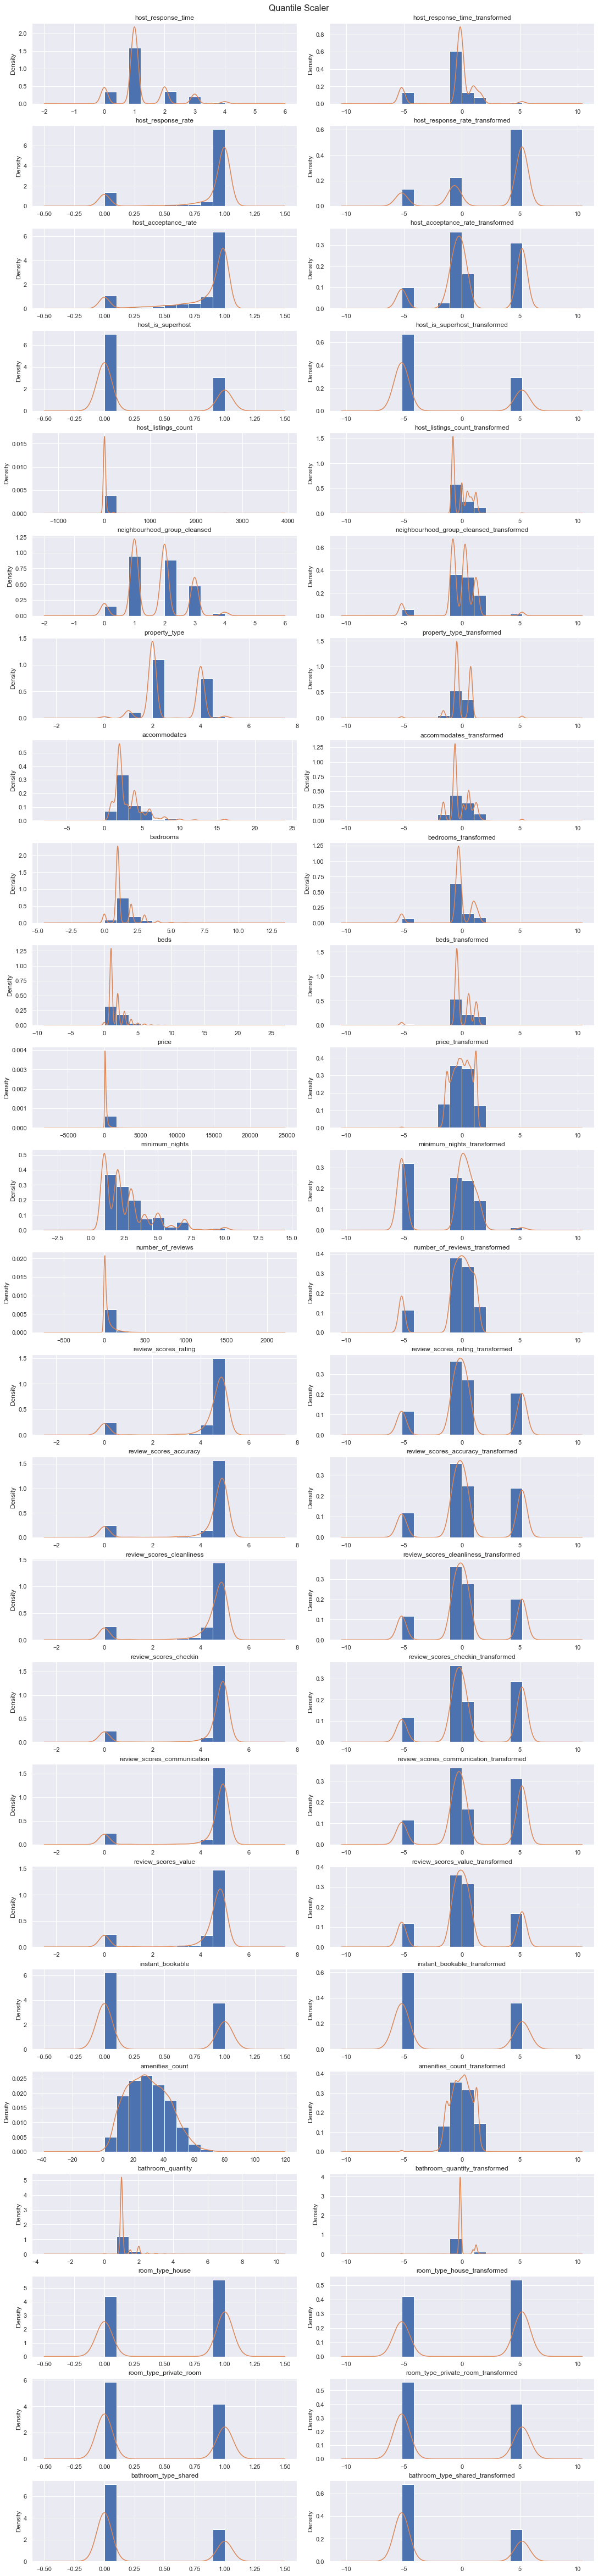

In [112]:
#trnasform the data
scaler = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
qtl_tdf = scaler.fit_transform(ny_listing_dataset)
qtl_tdf = pd.DataFrame(qtl_tdf, index=ny_listing_dataset.index, columns=ny_listing_dataset.columns)

plot_histograms_density(ny_listing_dataset, train_dataset_columns, qtl_tdf, 'Quantile Scaler')

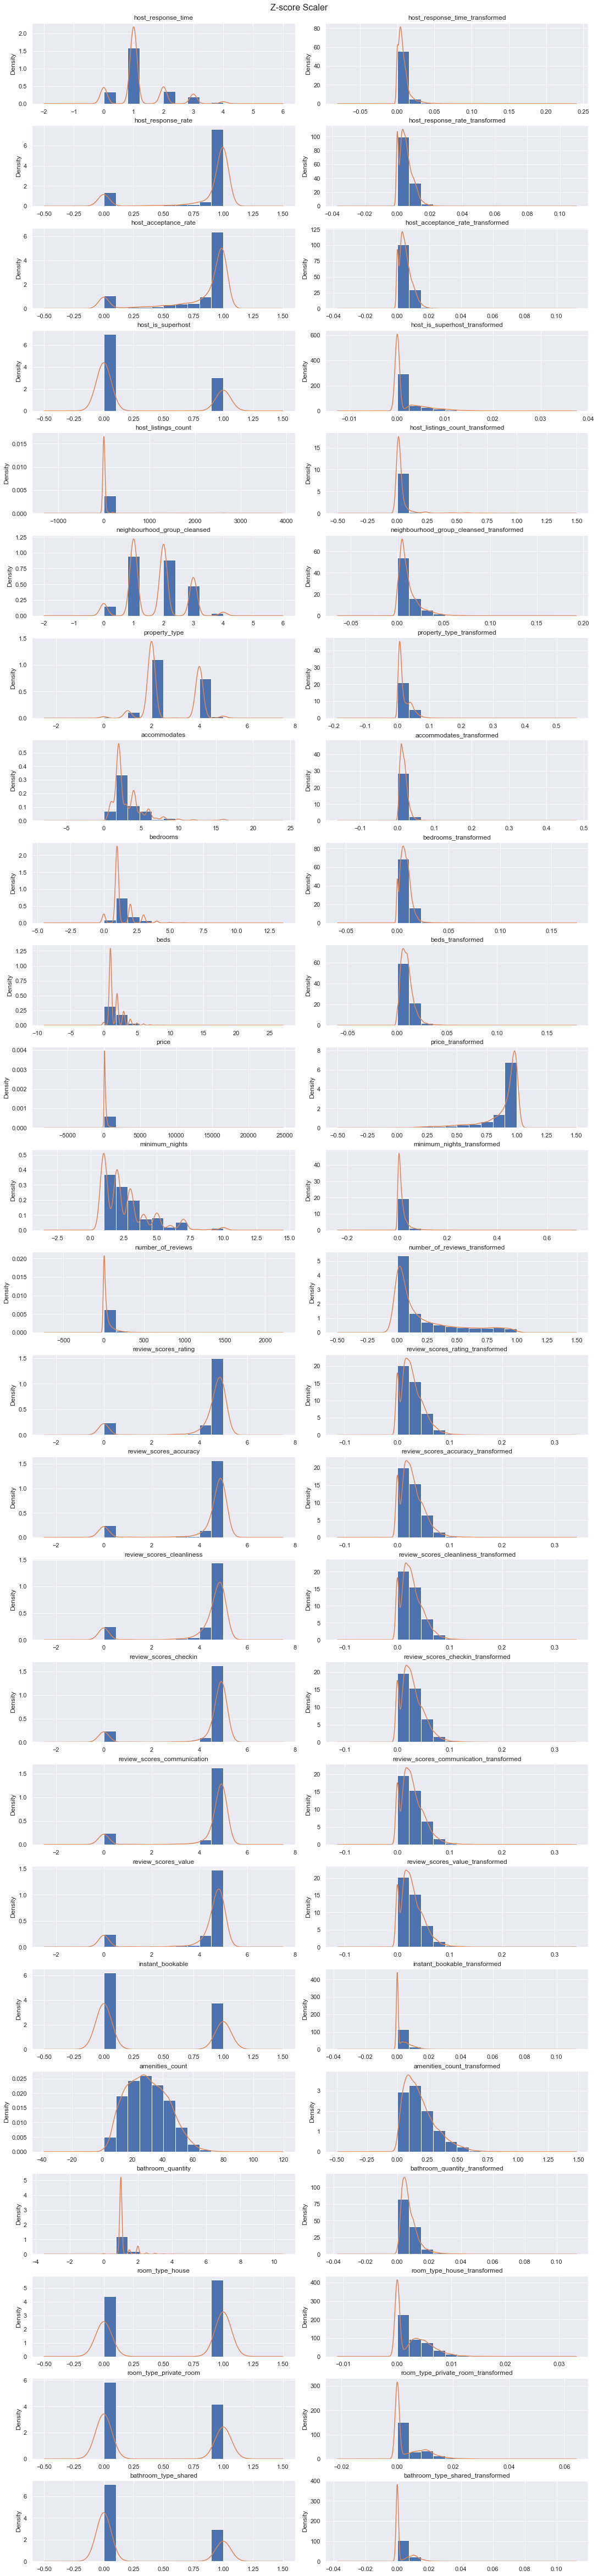

In [113]:
#transform the data
scaler = Normalizer()
zscore_tdf = scaler.fit_transform(ny_listing_dataset)
zscore_tdf = pd.DataFrame(zscore_tdf, index=ny_listing_dataset.index, columns=ny_listing_dataset.columns)

plot_histograms_density(ny_listing_dataset, train_dataset_columns, zscore_tdf, 'Z-score Scaler')


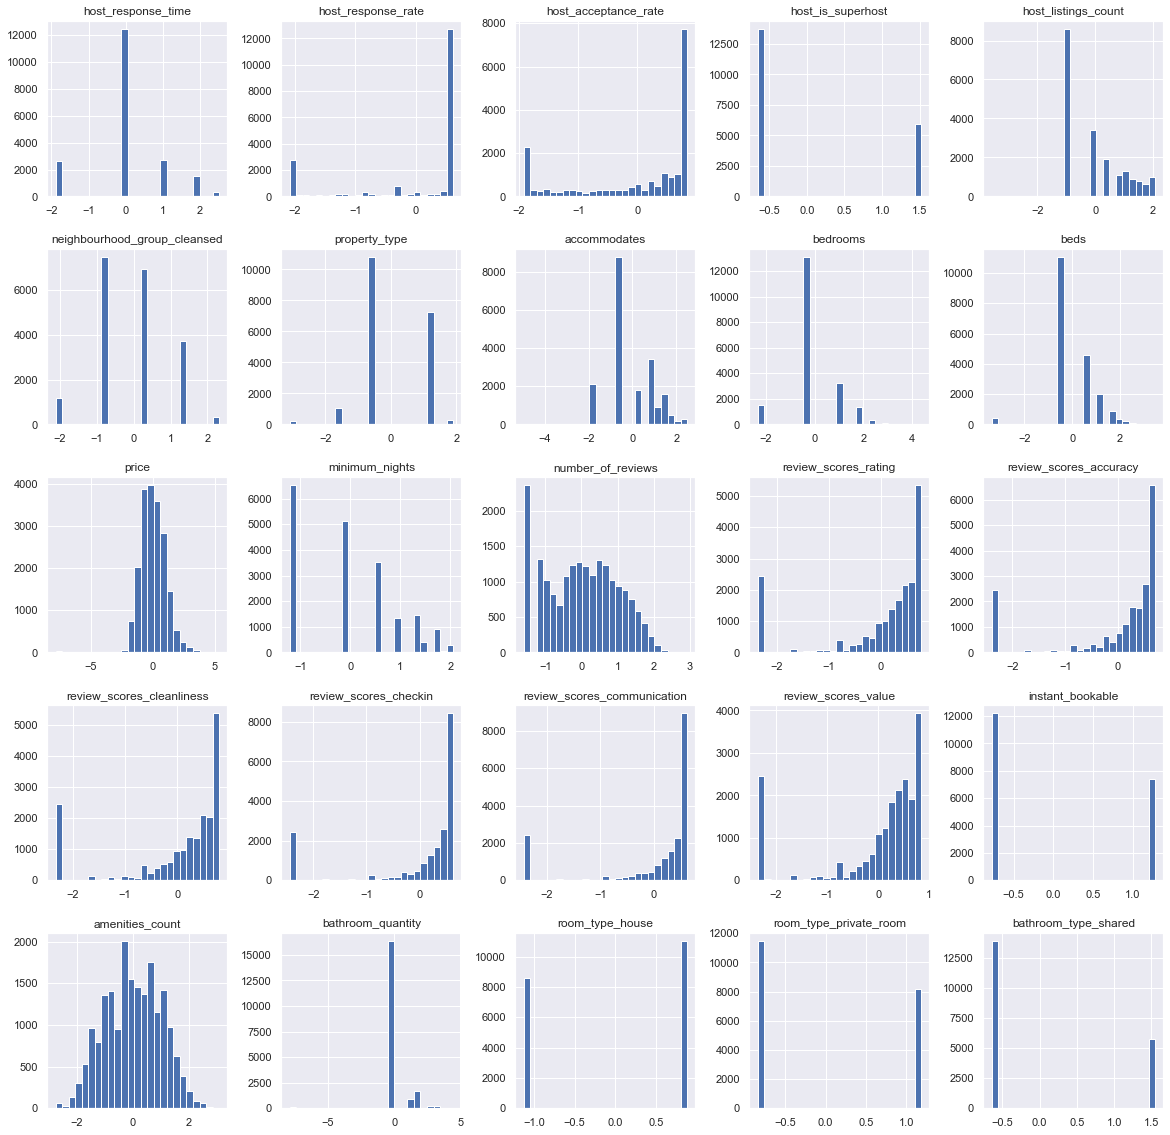

In [114]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True)
power_tdf = pt.fit_transform(ny_listing_dataset)
power_tdf = pd.DataFrame(power_tdf, index=ny_listing_dataset.index, columns=ny_listing_dataset.columns)

power_tdf.hist(figsize=(20,20), bins=25);

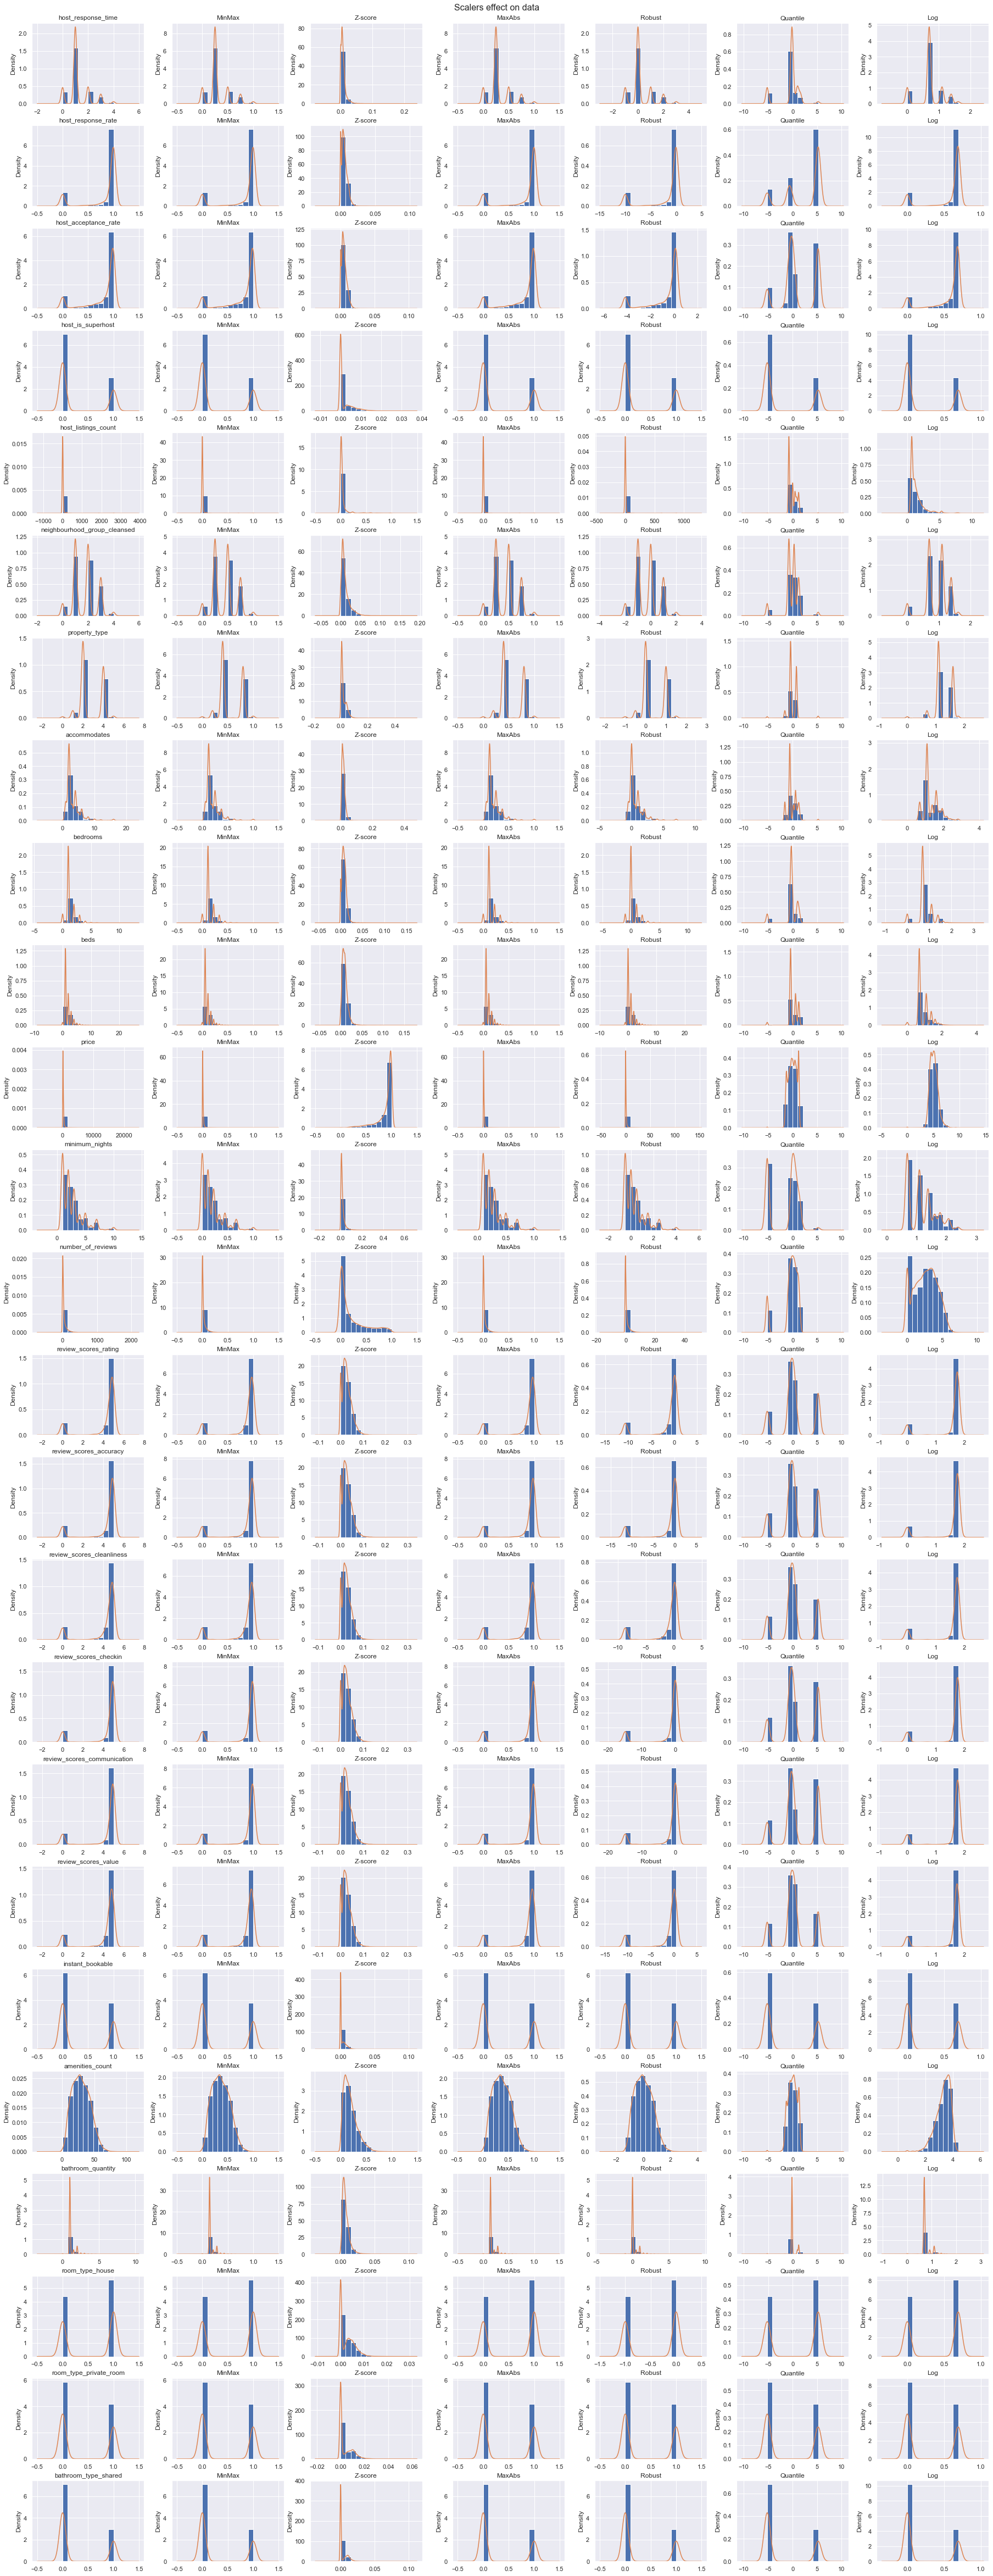

In [115]:
def plot_histograms_density_for_scalers(df, columns, fig_title, scalers, scaler_names):
    fig, axs = plt.subplots(len(columns),len(scalers)+1,figsize=(25,65),constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        ny_listing_dataset[c].hist(ax=axs[i], density=True) # normalizes the density
        ny_listing_dataset[c].plot.density(ax=axs[i], title=c)
        i+=1
        for j in range(len(scalers)):
            df_transformed = scalers[j].fit_transform(df)
            df_transformed = pd.DataFrame(df_transformed, index=df.index, columns=df.columns)
            df_transformed[c].hist(ax=axs[i], density=True, stacked=True) # normalizes the density
            df_transformed[c].plot.density(ax=axs[i], title=scaler_names[j])
            i+=1

scaler_names = ['MinMax', 'Z-score', 'MaxAbs', 'Robust', 'Quantile', 'Log']
arr_scalers = [MinMaxScaler(), Normalizer(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal'),FunctionTransformer(np.log1p)]
plot_histograms_density_for_scalers(ny_listing_dataset, train_dataset_columns, 'Scalers effect on data', arr_scalers, scaler_names)
            

In [116]:
price_features = ['bathroom_quantity', 'accommodates', 'bedrooms', 'beds', 'property_type', 'neighbourhood_group_cleansed', 
                  'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                  'review_scores_accuracy', 'review_scores_value', 'host_acceptance_rate', 'bathroom_type_shared', 
                  'host_listings_count', 'price']


nights_feature = ['property_type', 'room_type_house', 'room_type_private_room', 'host_acceptance_rate', 'instant_bookable', 
                  'host_response_time', 'review_scores_communication', 'review_scores_accuracy', 'host_listings_count', 
                  'review_scores_rating', 'neighbourhood_group_cleansed', 'review_scores_checkin', 'accommodates', 
                  'review_scores_value', 'amenities_count','minimum_nights']


score_features = ['review_scores_rating', 'review_scores_value', 'review_scores_cleanliness', 'review_scores_communication', 
                  'review_scores_checkin', 'host_is_superhost', 'amenities_count', 'number_of_reviews', 'host_acceptance_rate', 
                  'host_response_rate', 'property_type', 'minimum_nights', 'host_response_time', 'neighbourhood_group_cleansed', 
                  'instant_bookable','review_scores_accuracy']


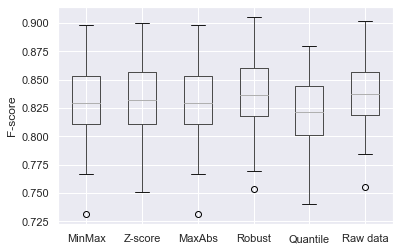

In [117]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


scaler_names = ['MinMax', 'Z-score', 'MaxAbs', 'Robust', 'Quantile']
arr_scalers = [MinMaxScaler(), Normalizer(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]
results = {}

model = KNeighborsClassifier(n_neighbors=3)




train_ds = test_df_min_nights[nights_feature].copy()



for i in range (len(arr_scalers)):
    # X is all the other variables
    X = train_ds.drop(columns=['minimum_nights'], axis=1).to_numpy()
    # Let's tranform X     
    X_t = arr_scalers[i].fit_transform(X)
    # y is has_diabetes that we want to forecast
    y = train_ds['minimum_nights'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(model, X_t, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
    results[scaler_names[i]] = scores
    
    
# Now let's create the model with the raw data just to put the models side-by-side
X = train_ds.drop(columns=['minimum_nights'], axis=1).to_numpy()
y = train_ds['minimum_nights'].to_numpy()
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
results['Raw data'] = scores


# Now let's create our boxplot
df_res = pd.DataFrame(results)
boxplot = df_res.boxplot() 
boxplot.set_ylabel('F-score')
plt.show()


/Users/shuvobarman/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/shuvobarman/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/shuvobarman/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/shuvobarman/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  war

/Users/shuvobarman/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/shuvobarman/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/shuvobarman/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/shuvobarman/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  war

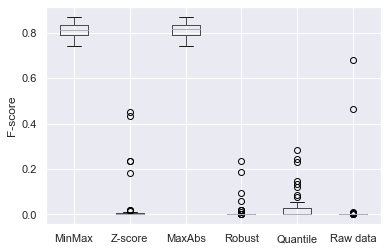

CPU times: user 547 ms, sys: 71.4 ms, total: 618 ms
Wall time: 1min 20s


In [118]:
%%time
model = SGDClassifier(loss="squared_error", penalty="l2", max_iter=1000)

for i in range (len(arr_scalers)):
    # X is all the other variables
    X = train_ds.drop(columns=['minimum_nights'], axis=1).to_numpy()
    # Let's tranform X     
    X_t = arr_scalers[i].fit_transform(X)
    # y is has_diabetes that we want to forecast
    y = train_ds['minimum_nights'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(model, X_t, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
    results[scaler_names[i]] = scores
    
    
# Now let's create the model with the raw data just to put the models side-by-side
X = train_ds.drop(columns=['minimum_nights'], axis=1).to_numpy()
y = train_ds['minimum_nights'].to_numpy()
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
results['Raw data'] = scores



# Now let's create our boxplot
df_res = pd.DataFrame(results)
boxplot = df_res.boxplot() 
boxplot.set_ylabel('F-score')
plt.show()

### Prediciting missing values and outliers

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

clean_data = ny_listing_dataset[nights_feature].copy()
test_df_min_nights_data = test_df_min_nights[nights_feature].copy()


# Let's prepare the data for our model
maxabs = MaxAbsScaler()
X = clean_data.drop(['minimum_nights'], axis=1).to_numpy()
X_t = maxabs.fit_transform(X)
y = clean_data['minimum_nights'].to_numpy()
model = LinearRegression()
model.fit(X, y)
# Now let's predict the missing rows
X_to_pred = test_df_min_nights_data.drop(['minimum_nights'], axis=1).to_numpy()
y_pred = model.predict(X_to_pred)
# let's add the data to the NaN rows
test_df_min_nights_data['min_nights_pred_linear'] = y_pred


# The best for KNN was the Robust scaler
X_ = clean_data.drop(['minimum_nights'], axis=1).to_numpy()
robust = RobustScaler()
X__t = robust.fit_transform(X_)
y_ = clean_data['minimum_nights'].to_numpy()
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X__t, y_)
# Now let's use the model to predict the missing rows
X__to_pred = test_df_min_nights_data.drop(['minimum_nights','min_nights_pred_linear'], axis=1).to_numpy()
# we need to transform the data in X_to_pred (do not fit, otherwise the scaler will change the ranges)
X__t_to_pred = robust.transform(X__to_pred)
y__pred = model.predict(X__t_to_pred)
# Let's add to the NaN rows the values predicted
test_df_min_nights_data['min_nights_pred_knn'] = y__pred

test_df_min_nights_data[['minimum_nights','min_nights_pred_linear','min_nights_pred_knn']].head(50)


minimum_nights  min_nights_pred_linear  min_nights_pred_knn
1266               30                2.722921             2.666667
21265              30                2.635577             3.000000
14873              30                3.654745             4.333333
2596               30                2.601330             2.333333
22701              30                2.896461             4.666667
23789              30                2.210670             1.000000
12769              30                2.412784             2.000000
31491              30                2.928905             5.666667
5479               30                3.409409             2.666667
12260              30                2.517255             2.000000
4415               30                3.564690             4.333333
14371             150                2.487230             3.000000
38046              30                2.382123             4.333333
10812              30                3.227052             2.000000
15000              31                2.720061             3.333333
6069               30                3.751992             2.666667
827                30                3.204577             3.000000
23368              30                4.120233             2.333333
4483               30                2.838094             3.000000
22208              29                2.544929             9.000000
18238              14                2.545539             5.000000
15043              14                3.377157             3.333333
5203               30                3.434409             6.000000
16328              30                3.437204             6.000000
17830              30                1.841489             1.666667
17338              30                2.196150             3.333333
2286               30                2.829443             3.666667
10365              30                2.493449             2.666667
5984               30                3.422082             3.666667
19029              30                1.786501             1.666667
8730               30                3.045269             3.333333
32995              30                2.907218             3.000000
10532              30                2.567159             1.000000
4550               30                2.726967             3.333333
554                30                2.730920             1.666667
25721              30                2.047719             7.333333
10944              30                1.990700             2.333333
7004               30                3.385358             5.666667
9705               30                3.447548             3.000000
15295              30                3.015365             1.666667
22507              85                3.773743             5.333333
31097              30                2.540286             2.666667
7459               30                2.141467             2.000000
32949              30                2.683095             1.666667
12549              30                3.362356             3.000000
3986               30                3.177117             2.666667
3928               30                3.047274             3.333333
26864              30                2.916952             1.333333
12216              30                2.787865             2.666667
4507               42                2.793208             3.666667

In [120]:
test_df_min_nights_data.min_nights_pred_linear.min()

0.8904124755419447

In [121]:
test_df_min_nights_data.min_nights_pred_linear.max()

4.621963021638267

In [122]:
test_df_min_nights_data.min_nights_pred_knn.min()

1.0

In [123]:
test_df_min_nights_data.min_nights_pred_knn.max()

10.0

In [124]:
clean_data = ny_listing_dataset[score_features].copy()
test_df_review_score_accuracy_data = test_df_review_score_accuracy[score_features].copy()


# Let's prepare the data for our model
maxabs = MaxAbsScaler()
X = clean_data.drop(['review_scores_accuracy'], axis=1).to_numpy()
X_t = maxabs.fit_transform(X)
y = clean_data['review_scores_accuracy'].to_numpy()
model = LinearRegression()
model.fit(X, y)
# Now let's predict the missing rows
X_to_pred = test_df_review_score_accuracy_data.drop(['review_scores_accuracy'], axis=1).to_numpy()
y_pred = model.predict(X_to_pred)
# let's add the data to the NaN rows
test_df_review_score_accuracy_data['review_scores_accuracy_pred_linear'] = y_pred


# The best for KNN was the Robust scaler
X_ = clean_data.drop(['review_scores_accuracy'], axis=1).to_numpy()
robust = RobustScaler()
X__t = robust.fit_transform(X_)
y_ = clean_data['review_scores_accuracy'].to_numpy()
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X__t, y_)
# Now let's use the model to predict the missing rows
X__to_pred = test_df_review_score_accuracy_data.drop(['review_scores_accuracy','review_scores_accuracy_pred_linear'], axis=1).to_numpy()
# we need to transform the data in X_to_pred (do not fit, otherwise the scaler will change the ranges)
X__t_to_pred = robust.transform(X__to_pred)
y__pred = model.predict(X__t_to_pred)
# Let's add to the NaN rows the values predicted
test_df_review_score_accuracy_data['review_scores_accuracy_knn'] = y__pred

test_df_review_score_accuracy_data[['review_scores_accuracy','review_scores_accuracy_pred_linear','review_scores_accuracy_knn']].head(50)


review_scores_accuracy  review_scores_accuracy_pred_linear  \
32377                     NaN                            0.620185   
12028                     NaN                            0.048147   
33678                     NaN                            0.044242   
21994                     NaN                            0.003720   
35487                     NaN                            0.001092   
38323                     NaN                            0.006758   
26218                     NaN                           -0.000384   
36255                     NaN                            0.144314   
7808                      NaN                            0.054440   
27595                     NaN                            0.149174   
28723                     NaN                            0.051813   
35951                     NaN                            0.002053   
22432                     NaN                            0.055299   
27445                     NaN                            0.049358   
23576                     NaN                            0.049400   
15839                     NaN                            0.045339   
15602                     NaN                            0.049066   
21564                     NaN                            0.052182   
32131                     NaN                            0.048525   
38936                     NaN                            0.007760   
23308                     NaN                            0.050269   
33599                     NaN                            0.003865   
23680                     NaN                            0.341069   
31290                     NaN                            0.012343   
34193                     NaN                            0.003525   
22468                     NaN                            0.054648   
24687                     NaN                            0.201937   
37133                     NaN                            0.054370   
11882                     NaN                            0.051875   
38958                     NaN                            0.000399   
31478                     NaN                           -0.003193   
19656                     NaN                            0.055361   
1641                      NaN                            0.052059   
8069                      NaN                            0.054072   
32017                     NaN                            0.059235   
16175                     NaN                            0.051200   
3013                      NaN                            0.055054   
38346                     NaN                            0.027377   
29083                     NaN                            0.020359   
24241                     NaN                            0.050908   
32092                     NaN                            0.018585   
37833                     NaN                            0.002902   
20629                     NaN                            0.007848   
34553                     NaN                            0.057337   
8193                      NaN                            0.051998   
2670                      NaN                            0.118678   
19748                     NaN                           -0.000250   
30985                     NaN                            0.003856   
14479                     NaN                            0.052964   
24541                     NaN                            0.057913   

       review_scores_accuracy_knn  
32377                         0.0  
12028                         0.0  
33678                         0.0  
21994                         0.0  
35487                         0.0  
38323                         0.0  
26218                         0.0  
36255                         0.0  
7808                          0.0  
27595                         0.0  
28723                         0.0  
35951                         0.0  
22432              

In [125]:
test_df_review_score_accuracy_data.review_scores_accuracy_pred_linear.min()

-0.008935998522288074

In [126]:
test_df_review_score_accuracy_data.review_scores_accuracy_pred_linear.max()

2.8925932443945532

In [127]:
test_df_review_score_accuracy_data.review_scores_accuracy_knn.min()

0.0

In [128]:
test_df_review_score_accuracy_data.review_scores_accuracy_knn.max()

1.0

In [129]:
test_df_min_nights_data.min_nights_pred_linear.describe()

count    2000.000000
mean        2.941563
std         0.499252
min         0.890412
25%         2.560895
50%         2.972506
75%         3.351433
max         4.621963
Name: min_nights_pred_linear, dtype: float64

In [130]:
test_df_min_nights_data.min_nights_pred_knn.describe()

count    2000.000000
mean        3.055000
std         1.507352
min         1.000000
25%         2.000000
50%         2.666667
75%         3.666667
max        10.000000
Name: min_nights_pred_knn, dtype: float64

In [131]:
test_df_review_score_accuracy_data.review_scores_accuracy_pred_linear.describe()

count    2000.000000
mean        0.051935
std         0.095129
min        -0.008936
25%         0.014157
50%         0.051951
75%         0.054578
max         2.892593
Name: review_scores_accuracy_pred_linear, dtype: float64

In [132]:
test_df_review_score_accuracy_data.review_scores_accuracy_knn.describe()

count    2000.000000
mean        0.001000
std         0.031615
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: review_scores_accuracy_knn, dtype: float64

We can see that, for different feature different machine learning algorithm and different scaling technique works better. For minimum nights we will select KNN with robust scaler and for review score accuracy we will select linear algorithm with maxabs scaler

In [133]:
test_df_min_nights['minimum_nights'] = test_df_min_nights_data['min_nights_pred_knn']
test_df_min_nights.head(20)

host_response_time  host_response_rate  host_acceptance_rate  \
1266                  0.0                0.00                  0.00   
21265                 0.0                0.00                  0.00   
14873                 0.0                0.00                  0.00   
2596                  0.0                0.00                  0.00   
22701                 0.0                0.00                  0.00   
23789                 1.0                1.00                  0.93   
12769                 0.0                0.00                  0.00   
31491                 3.0                0.66                  0.70   
5479                  0.0                0.00                  0.00   
12260                 0.0                0.00                  0.00   
4415                  0.0                0.00                  0.00   
14371                 0.0                0.00                  0.00   
38046                 3.0                0.75                  1.00   
10812                 2.0                0.94                  0.79   
15000                 3.0                0.80                  0.79   
6069                  3.0                0.89                  0.24   
827                   0.0                0.00                  0.00   
23368                 4.0                0.43                  0.45   
4483                  1.0                1.00                  0.90   
22208                 1.0                0.99                  0.62   

       host_is_superhost  host_listings_count  neighbourhood_group_cleansed  \
1266                 0.0                  1.0                             1   
21265                0.0                  1.0                             2   
14873                0.0                  1.0                             1   
2596                 0.0                  1.0                             1   
22701                0.0                  1.0                             1   
23789                0.0                142.0                             3   
12769                0.0                  2.0                             3   
31491                0.0                 15.0                             1   
5479                 0.0                  1.0                             2   
12260                0.0                  2.0                             1   
4415                 0.0                  1.0                             1   
14371                0.0                  1.0                             1   
38046                0.0                  2.0                             2   
10812                0.0                 83.0                             2   
15000                0.0                  3.0                             1   
6069                 0.0                  6.0                             2   
827                  0.0                  1.0                             3   
23368                0.0                110.0                             2   
4483                 0.0                  2.0                             1   
22208                0.0                327.0                             2   

       property_type  accommodates  bedrooms  beds  ...  \
1266               3             1       1.0   1.0  ...   
21265              3             2       1.0   1.0  ...   
14873              2             2       0.0   1.0  ...   
2596               3             2       1.0   2.0  ...   
22701              2             5       2.0   3.0  ...   
23789              3             1       1.0   1.0  ...   
12769              3             2       1.0   2.0  ...   
31491              3             1       1.0   1.0  ...   
5479               2             2       0.0   1.0  ...   
12260              3             3       1.0   2.0  ...   
4415               2             2       1.0   1.0  ...   
14371              3             1       1.0   1.0  ...   
38046              3             4       3.0   3.0  ...   
10812              2         

In [134]:
test_df_review_score_accuracy['review_scores_accuracy'] = test_df_review_score_accuracy_data['review_scores_accuracy_pred_linear']
test_df_review_score_accuracy.head(20)


host_response_time  host_response_rate  host_acceptance_rate  \
32377                 0.0                0.00                  0.00   
12028                 2.0                0.94                  0.79   
33678                 1.0                1.00                  0.57   
21994                 0.0                0.00                  0.00   
35487                 1.0                0.78                  0.89   
38323                 0.0                0.00                  0.00   
26218                 4.0                0.40                  1.00   
36255                 2.0                1.00                  0.90   
7808                  0.0                0.00                  0.00   
27595                 3.0                0.96                  0.05   
28723                 0.0                0.00                  0.00   
35951                 1.0                1.00                  1.00   
22432                 0.0                0.00                  0.00   
27445                 0.0                0.00                  0.00   
23576                 1.0                1.00                  0.00   
15839                 0.0                0.00                  0.00   
15602                 0.0                0.00                  0.00   
21564                 0.0                0.00                  0.00   
32131                 1.0                0.80                  0.33   
38936                 1.0                1.00                  1.00   

       host_is_superhost  host_listings_count  neighbourhood_group_cleansed  \
32377                0.0                  1.0                             0   
12028                0.0                 83.0                             2   
33678                0.0                  3.0                             2   
21994                0.0                  1.0                             2   
35487                0.0                  6.0                             2   
38323                0.0                  1.0                             3   
26218                0.0                 69.0                             2   
36255                1.0                  3.0                             2   
7808                 0.0                  1.0                             1   
27595                1.0                290.0                             1   
28723                0.0                  1.0                             2   
35951                0.0                  1.0                             2   
22432                0.0                  1.0                             1   
27445                0.0                  1.0                             2   
23576                0.0                  1.0                             2   
15839                0.0                 11.0                             2   
15602                0.0                  2.0                             3   
21564                0.0                  1.0                             2   
32131                0.0                  2.0                             2   
38936                0.0                  3.0                             0   

       property_type  accommodates  bedrooms  beds  ...  \
32377              4             2       2.0   2.0  ...   
12028              0             4       1.0   1.0  ...   
33678              2             2       1.0   1.0  ...   
21994              4             2       2.0   2.0  ...   
35487              1             4       1.0   2.0  ...   
38323              2             6       2.0   3.0  ...   
26218              1             2       0.0   1.0  ...   
36255              4             1       1.0   1.0  ...   
7808               4             1       1.0   1.0  ...   
27595              4             1       1.0   1.0  ...   
28723              2             4       1.0   2.0  ...   
35951              2             8       4.0   4.0  ...   
22432              4             2       1.0   0.0  ...   
27445              2         

In [135]:
test_df_min_nights.columns = test_df_review_score_accuracy.columns

In [136]:
test_dataset_combined = pd.concat([test_df_min_nights, test_df_review_score_accuracy], ignore_index=True)
test_dataset_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            4000 non-null   float64
 1   host_response_rate            4000 non-null   float64
 2   host_acceptance_rate          4000 non-null   float64
 3   host_is_superhost             4000 non-null   float64
 4   host_listings_count           4000 non-null   float64
 5   neighbourhood_group_cleansed  4000 non-null   int64  
 6   property_type                 4000 non-null   int64  
 7   accommodates                  4000 non-null   int64  
 8   bedrooms                      4000 non-null   float64
 9   beds                          4000 non-null   float64
 10  price                         4000 non-null   float64
 11  minimum_nights                4000 non-null   float64
 12  number_of_reviews             4000 non-null   int64  
 13  rev

In [137]:
ny_listing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19613 entries, 6 to 39880
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            19613 non-null  float64
 1   host_response_rate            19613 non-null  float64
 2   host_acceptance_rate          19613 non-null  float64
 3   host_is_superhost             19613 non-null  int64  
 4   host_listings_count           19613 non-null  float64
 5   neighbourhood_group_cleansed  19613 non-null  int64  
 6   property_type                 19613 non-null  int64  
 7   accommodates                  19613 non-null  int64  
 8   bedrooms                      19613 non-null  float64
 9   beds                          19613 non-null  float64
 10  price                         19613 non-null  float64
 11  minimum_nights                19613 non-null  int64  
 12  number_of_reviews             19613 non-null  int64  
 13  r

We will use KNeighborsRegressor with Robust Scaler

# Predicting Price
### Here we will be using two separate machine learning techniques to evaluate this information the first will be linear regression and the second will be K-Nearest Neighbour like in our previous outlier detection. In our first attempt we will only be feature a baseline assessment before honing in the answer with different machine learning methods.

In [138]:
# assuming for this case that traning is - ny_listing_dataset 
# assuming for this case that testing is - test_dataset_combined

#clean_data = ny_listing_dataset[price_features].copy()
#test_data = test_dataset_combined[price_features].copy()

clean_data = ny_listing_dataset.copy()
test_data = test_dataset_combined.copy()

clean_data['price'] = clean_data['price'].astype('int64')
test_data['price'] = test_data['price'].astype('int64')

In [139]:
column_order = ['host_response_time','host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
                'neighbourhood_group_cleansed', 'property_type', 'accommodates', 'bedrooms', 'beds', 'minimum_nights',
               'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
               'review_scores_checkin', 'review_scores_communication', 'review_scores_value', 'instant_bookable',
               'amenities_count', 'bathroom_quantity', 'room_type_house', 'room_type_private_room', 'bathroom_type_shared',
               'price']


clean_data_ = clean_data[column_order]
test_data_ = test_data[column_order]

In [140]:
clean_data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19613 entries, 6 to 39880
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            19613 non-null  float64
 1   host_response_rate            19613 non-null  float64
 2   host_acceptance_rate          19613 non-null  float64
 3   host_is_superhost             19613 non-null  int64  
 4   host_listings_count           19613 non-null  float64
 5   neighbourhood_group_cleansed  19613 non-null  int64  
 6   property_type                 19613 non-null  int64  
 7   accommodates                  19613 non-null  int64  
 8   bedrooms                      19613 non-null  float64
 9   beds                          19613 non-null  float64
 10  minimum_nights                19613 non-null  int64  
 11  number_of_reviews             19613 non-null  int64  
 12  review_scores_rating          19613 non-null  float64
 13  r

In [141]:
test_data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            4000 non-null   float64
 1   host_response_rate            4000 non-null   float64
 2   host_acceptance_rate          4000 non-null   float64
 3   host_is_superhost             4000 non-null   float64
 4   host_listings_count           4000 non-null   float64
 5   neighbourhood_group_cleansed  4000 non-null   int64  
 6   property_type                 4000 non-null   int64  
 7   accommodates                  4000 non-null   int64  
 8   bedrooms                      4000 non-null   float64
 9   beds                          4000 non-null   float64
 10  minimum_nights                4000 non-null   float64
 11  number_of_reviews             4000 non-null   int64  
 12  review_scores_rating          4000 non-null   float64
 13  rev

# Data Preparation
#### First, we will perform some data scaling methods to adjust the data to its proper form.

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Let's prepare the data for our model
maxabs = MaxAbsScaler()
X = clean_data_.drop(['price'], axis=1).to_numpy()
X_t = maxabs.fit_transform(X)
y = clean_data_['price'].to_numpy()
model = LinearRegression()
model.fit(X, y)
# Now let's predict the missing rows
X_to_pred = test_data_.drop(['price'], axis=1).to_numpy()
y_pred = model.predict(X_to_pred)
# let's add the data to the NaN rows
test_data_['price_pred_linear'] = y_pred


# The best for KNN was the Robust scaler
X_ = clean_data_.drop(['price'], axis=1).to_numpy()
robust = RobustScaler()
X__t = robust.fit_transform(X_)
y_ = clean_data_['price'].to_numpy()
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X__t, y_)
# Now let's use the model to predict the missing rows
X__to_pred = test_data_.drop(['price','price_pred_linear'], axis=1).to_numpy()
# we need to transform the data in X_to_pred (do not fit, otherwise the scaler will change the ranges)
X__t_to_pred = robust.transform(X__to_pred)
y__pred = model.predict(X__t_to_pred)
# Let's add to the NaN rows the values predicted
test_data_['price_pred_knn'] = y__pred

test_data_[['price_pred_linear','price_pred_knn']] = test_data_[['price_pred_linear','price_pred_knn']].astype('int64')

test_data_[['price','price_pred_linear','price_pred_knn']].head(50)

/var/folders/__/02h4kb7x4d94q5008bzqg4gm0000gn/T/ipykernel_3634/532839353.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_['price_pred_linear'] = y_pred
/var/folders/__/02h4kb7x4d94q5008bzqg4gm0000gn/T/ipykernel_3634/532839353.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_['price_pred_knn'] = y__pred
/var/folders/__/02h4kb7x4d94q5008bzqg4gm0000gn/T/ipykernel_3634/532839353.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

price  price_pred_linear  price_pred_knn
0      89                132              59
1     150                261              62
2     125                250             217
3      51                130              55
4     100                315             282
5      35                246             383
6      70                168             102
7      38                417              77
8     209                170             155
9      50                358              71
10    165                156             164
11     80                134              81
12    104                333             289
13    175                235             408
14     48                147              71
15     80                215             290
16     89                206             112
17    125                273             356
18     76                123             185
19    469                504             325
20    185                227             301
21     65                229             111
22    500                229             189
23    104                165             158
24    113                236              83
25     36                134             126
26     40                232              56
27     62                116              75
28     70                266             163
29     65                107             124
30     45                291             253
31    139                156             157
32     45                152              81
33     37                188              68
34     40                222              56
35     45                253              36
36     75                143              89
37     70                144             146
38    425                300             180
39     40                219              56
40     85                245             186
41     63                184             124
42     50                582              93
43    333                344             347
44    150                198             214
45     68                 87             111
46    250                448             509
47    130                204             247
48     55                160             111
49    183                286             233

In [143]:
test_data.head(50)

host_response_time  host_response_rate  host_acceptance_rate  \
0                  0.0                0.00                  0.00   
1                  0.0                0.00                  0.00   
2                  0.0                0.00                  0.00   
3                  0.0                0.00                  0.00   
4                  0.0                0.00                  0.00   
5                  1.0                1.00                  0.93   
6                  0.0                0.00                  0.00   
7                  3.0                0.66                  0.70   
8                  0.0                0.00                  0.00   
9                  0.0                0.00                  0.00   
10                 0.0                0.00                  0.00   
11                 0.0                0.00                  0.00   
12                 3.0                0.75                  1.00   
13                 2.0                0.94                  0.79   
14                 3.0                0.80                  0.79   
15                 3.0                0.89                  0.24   
16                 0.0                0.00                  0.00   
17                 4.0                0.43                  0.45   
18                 1.0                1.00                  0.90   
19                 1.0                0.99                  0.62   
20                 1.0                1.00                  1.00   
21                 0.0                0.00                  0.00   
22                 1.0                1.00                  0.00   
23                 0.0                0.00                  0.00   
24                 1.0                1.00                  0.98   
25                 0.0                0.00                  0.67   
26                 0.0                0.00                  0.00   
27                 0.0                0.00                  0.00   
28                 0.0                0.00                  0.00   
29                 1.0                0.80                  1.00   
30                 3.0                0.90                  0.33   
31                 2.0                1.00                  1.00   
32                 0.0                0.00                  0.00   
33                 0.0                0.00                  0.00   
34                 0.0                0.00                  0.00   
35                 1.0                1.00                  1.00   
36                 1.0                1.00                  1.00   
37                 0.0                0.00                  0.00   
38                 0.0                0.00                  0.00   
39                 3.0                1.00                  0.00   
40                 0.0                0.00                  0.00   
41                 2.0                1.00                  0.80   
42                 2.0                1.00                  0.88   
43                 1.0                1.00                  0.93   
44                 0.0                0.00                  0.00   
45                 0.0                0.00                  0.50   
46                 2.0                1.00                  0.78   
47                 1.0                1.00                  0.98   
48                 3.0                1.00                  0.80   
49                 1.0                1.00                  0.94   

    host_is_superhost  host_listings_count  neighbourhood_group_cleansed  \
0                 0.0                  1.0                             1   
1                 0.0                  1.0                             2   
2                 0.0                  1.0                             1   
3                 0.0                  1.0                             1   
4                 0.0                  1.0                             1   
5                 0.0                142.0                             3   
6  

In [144]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19613 entries, 6 to 39880
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            19613 non-null  float64
 1   host_response_rate            19613 non-null  float64
 2   host_acceptance_rate          19613 non-null  float64
 3   host_is_superhost             19613 non-null  int64  
 4   host_listings_count           19613 non-null  float64
 5   neighbourhood_group_cleansed  19613 non-null  int64  
 6   property_type                 19613 non-null  int64  
 7   accommodates                  19613 non-null  int64  
 8   bedrooms                      19613 non-null  float64
 9   beds                          19613 non-null  float64
 10  price                         19613 non-null  int64  
 11  minimum_nights                19613 non-null  int64  
 12  number_of_reviews             19613 non-null  int64  
 13  r

# Baseline Model
#### This model is KNN regrassion and normazation to give us a good platform to test how the data responds to machine learning methods under standard methods.

In [146]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score, mean_absolute_error



end = clean_data_.columns.get_loc("price")
robust_data_set_a_X = clean_data.iloc[: , :end]
robust_data_set_a_Y = clean_data.iloc[: , end]

robust_TRAIN_X, robust_TEST_X, robust_TRAIN_Y, robust_TEST_Y = train_test_split(robust_data_set_a_X, robust_data_set_a_Y, test_size=0.10, random_state=100)
scaller = Normalizer()

#RobustScaler()
robust_TRAIN_X = scaler.fit_transform(robust_TRAIN_X)
robust_TEST_X  = scaler.transform(robust_TEST_X)

# Train and test
knn = KNeighborsRegressor(n_neighbors=5, metric="euclidean")
knn.fit(robust_TRAIN_X, robust_TRAIN_Y)
robust_data_set_a_pred = knn.predict(robust_TEST_X)
y_pred_1 = np.around(knn.predict(robust_TEST_X))


output_data = pd.DataFrame()
output_data['actual_price']= robust_TEST_Y
output_data['price_pred'] = y_pred_1


score = r2_score(output_data['actual_price'], output_data['price_pred'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

score_mae = mean_absolute_error(output_data['actual_price'], output_data['price_pred'])
print("The Mean Absolute Error of our Model is {}".format(round(score_mae, 2)))


score_mse = np.sqrt(mean_absolute_error(output_data['actual_price'], output_data['price_pred']))
print("The Mean Absolute Error of our Model is {}".format(round(score_mse, 2)))


The accuracy of our model is 41.0%
The Mean Absolute Error of our Model is 0.12
The Mean Absolute Error of our Model is 0.35


In [147]:
clean_data = clean_data[price_features]
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19613 entries, 6 to 39880
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroom_quantity             19613 non-null  float64
 1   accommodates                  19613 non-null  int64  
 2   bedrooms                      19613 non-null  float64
 3   beds                          19613 non-null  float64
 4   property_type                 19613 non-null  int64  
 5   neighbourhood_group_cleansed  19613 non-null  int64  
 6   review_scores_rating          19613 non-null  float64
 7   review_scores_cleanliness     19613 non-null  float64
 8   review_scores_checkin         19613 non-null  float64
 9   review_scores_communication   19613 non-null  float64
 10  review_scores_accuracy        19613 non-null  float64
 11  review_scores_value           19613 non-null  float64
 12  host_acceptance_rate          19613 non-null  float64
 13  b

# Performance Model
#### Here we have upgraded our original model with the robust scaler and have greatly improved our data output.

In [148]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score



end = clean_data_.columns.get_loc("price")
robust_data_set_a_X = clean_data.iloc[: , :end]
robust_data_set_a_Y = clean_data['price']

robust_TRAIN_X, robust_TEST_X, robust_TRAIN_Y, robust_TEST_Y = train_test_split(robust_data_set_a_X, robust_data_set_a_Y, test_size=0.10, random_state=100)
scaller = Normalizer()

#RobustScaler()
robust_TRAIN_X = scaler.fit_transform(robust_TRAIN_X)
robust_TEST_X  = scaler.transform(robust_TEST_X)

# Train and test
knn = KNeighborsRegressor(n_neighbors=5, metric="euclidean")
knn.fit(robust_TRAIN_X, robust_TRAIN_Y)
robust_data_set_a_pred = knn.predict(robust_TEST_X)
y_pred_1 = np.around(knn.predict(robust_TEST_X))


output_data = pd.DataFrame()
output_data['actual_price']= robust_TEST_Y
output_data['price_pred'] = y_pred_1


score = r2_score(output_data['actual_price'], output_data['price_pred'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

score_mae = mean_absolute_error(output_data['actual_price'], output_data['price_pred'])
print("The Mean Absolute Error of our Model is {}".format(round(score_mae, 2)))


score_mse = np.sqrt(mean_absolute_error(output_data['actual_price'], output_data['price_pred']))
print("The Mean Absolute Error of our Model is {}".format(round(score_mse, 2)))


The accuracy of our model is 79.0%
The Mean Absolute Error of our Model is 17.47
The Mean Absolute Error of our Model is 4.18


# Conclusion
#### In this project we have use the methods of data science such as data cleaning, feature engineering, data scaling and machine leaning to predict the price of New York city Airbnb listings.
#### In order to do so we have presented the relevant feature corresponding to price and how these features can be interpreted as a model which will allow for better price prediction and analysis in the future.
#### In this case the top most relevant features were: number of host listing review scores and room type.